# Problem definition 

An insurance company wants to identify customers willing to buy a new product. They gathered data about customers to whom they offered the new product. You get information about whether they did or did not sign up for the new product, together with some customer information and information about their buying behavior of two other products.

# Collecting raw data and importing libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook')
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/insurance-company/Customer_data.csv')

# Exploration of dataset structure and description 

In [3]:
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


## Shape and datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


## Statistics per variable

In [5]:
df.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744923,264.131538,2.0,43.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


### Noteworthy

* loyalty: mayority unclassified (99) - correlated with another feature? otherwise remove entirely.
* city: code -999999 must be an error, resulting in outlier, messing up the city statistics
* turnover_A: mean 379.16, max 5568.78, outliers?
* turnover_B: mean 328.62, max 12249.08, outliers?

# Feature engineering / data cleaning

## Checklist

* Missing data
* Outliers <br> 
* Duplicates<br>
* Constant variables<br> 
* Quasi - constant variables <br>
* Correlation = same information <br>
* Redundancy<br> 
* Distribution<br> 
* Turn labels/strings in categorical variables into numeric data<br> 
* Rare labels<br> 
* Feature magnitude - scale

## Missing data 

In [6]:
df.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

## Target

In [7]:
df['TARGET'] = df['TARGET'].map({'Y': 1, 'N': 0})

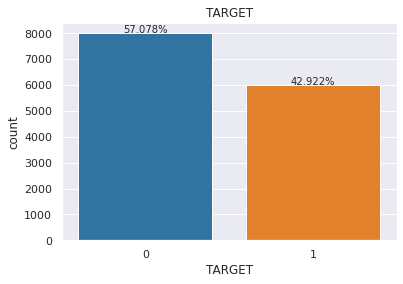

In [8]:
ax = sns.countplot(x="TARGET", data=df)
plt.title('TARGET')

total = len(df['TARGET'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

## Correlation matrix
* X = independent variables
* y = dependent variable (TARGET)

In [9]:
df_X = df.drop('TARGET', axis=1)

### X and y

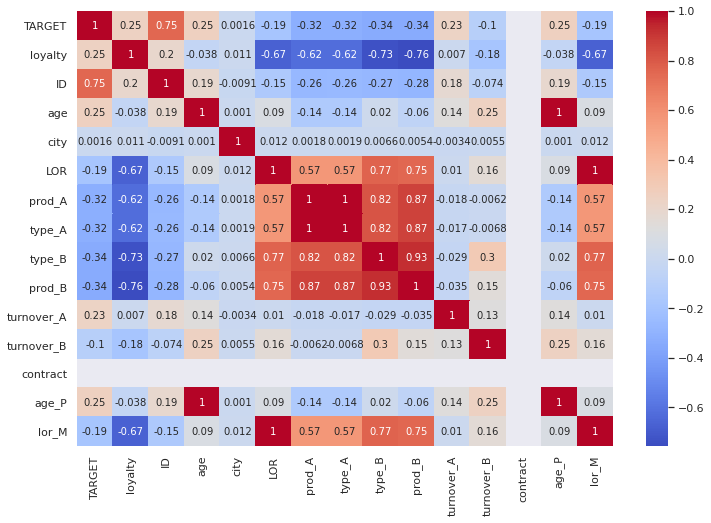

In [10]:
cm = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm')

### X


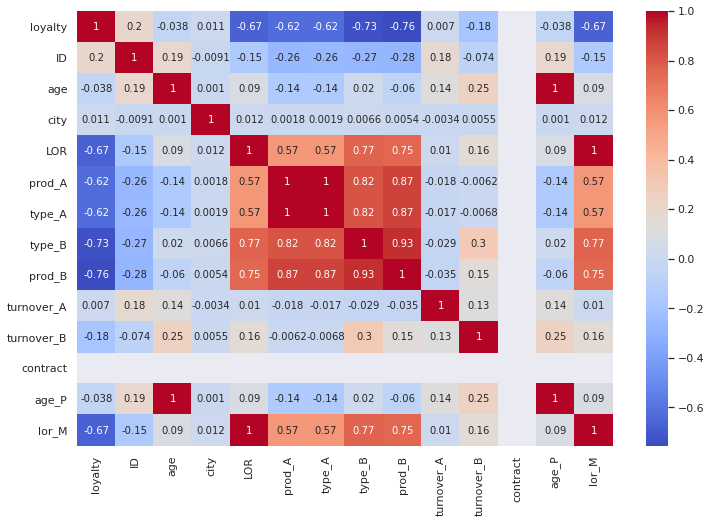

In [11]:
cm_X = (df_X).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm_X, annot=True, cmap='coolwarm')

Findings: <br>
<ul>
<li>**contract** = constant variable =  no information<br>
</li> 
<li>**prod_A and type_A** have correlation of 1 = redundant<br>
</li>  
<li>**age and age_p** have a correlation of 1 = duplicate<br>
</li>   
<li>**LOR and lor_M** have a correlation of 1 = duplicate<br>
</li>   
<li>**ID** is highly correlated with TARGET<br>
</li>  
<li>**Loyalty** is highly correlated with prod_A/Type_A and prod_B/Type A<br>
</li>   
<li>**Loyalty** is highly correlated with LOR and thus also lor_M</li> 
</ul>
</li>   
<li>collinearity (independent variables are correlated)</li> 
</ul>


#### VIF: Variance inflation factor 

* helps a formal detection-tolerance for multicollinearity. VIF of 5 or 10 and above (depends on the business problem) indicates a multicollinearity problem.

In [12]:
# https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_ = add_constant(df)

In [13]:
pd.Series([variance_inflation_factor(X_.values, i)
           for i in range(X_.shape[1])],
          index=X_.columns)

# VIF of 5 or 10 and above indicates a multicollinearity problem.
# If there is perfect correlation, then VIF = infinity.

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


TARGET          2.592551
loyalty         2.502648
ID              2.317402
age                  inf
city            1.001148
LOR                  inf
prod_A        128.938020
type_A        128.276594
type_B         12.080500
prod_B         13.196489
turnover_A      1.109301
turnover_B      1.633436
contract        0.000000
age_P                inf
lor_M                inf
dtype: float64

## ID

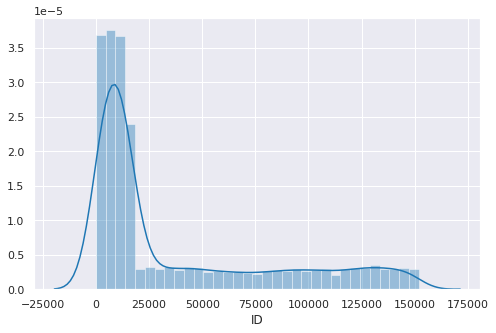

In [14]:
# Distribution
plt.figure(figsize=(8, 5))
sns.distplot(df['ID'])

* Majority has low ID, was the experiment done on loyal/long time members of the company?

### Check for duplicates

In [15]:
df['ID'].value_counts().head(5)

66853     2
147678    2
21091     2
107064    2
139877    2
Name: ID, dtype: int64

In [16]:
df[df['ID'].duplicated(keep=False)]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,1,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,1,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,1,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


6016 rows, thus 3008 rows are a duplicate of an ID.

In [17]:
print(str(np.round((3008/len(df))*100, decimals=3)) +
      '% of the samples have a duplicate ID')

21.461% of the samples have a duplicate ID


In [18]:
df[df['ID'] == 306]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.00837,2,62,3
11012,1,99,306,62,2,0,0,0,0,0,384.577469,287.00837,2,62,3


In [19]:
df['turnover_A'].nunique()

11008

In [20]:
# Double check: 11008 unique values and we have 14016 samples
14016-11008
# Conclussion: 3008 duplicate records in the dataset

3008

In [21]:
df.shape

(14016, 15)

In [22]:
# remove duplicate records
# there is no timestamp record, so does not matter which of the two duplicate id rows I remove
df = df.drop_duplicates(subset=['ID', 'turnover_A'], keep='first')

In [23]:
df.shape

(11008, 15)

## Target (after removing duplicate ID samples)

<ul>
<li>Findings <b>before</b> removing duplicate ID's : <br>57% didn't buy the new product <br>43% bought the new product<br><br></li> 
<li>Findings <b>after</b> removing duplicate ID's: <br>73% didn't buy the new product <br>27% bought the new product<br><br></li>     
Increase in imbalance (will reduce model performance).







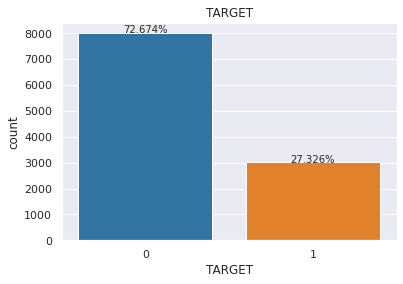

In [24]:
ax = sns.countplot(x="TARGET", data=df)
plt.title('TARGET')

total = len(df['TARGET'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

## Loyalty 

<ul>
<li>Findings <b>before</b> removing duplicate ID's: 49.843% unclassified </li> 
<li>Findings <b>after</b> removing duplicate ID's: 45.858% unclassified</li> 
</ul>





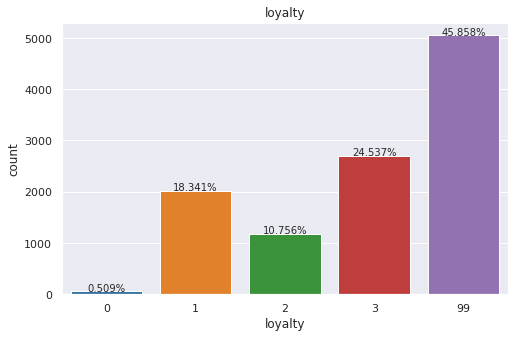

In [25]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="loyalty", data=df)
plt.title('loyalty')

total = len(df['loyalty'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

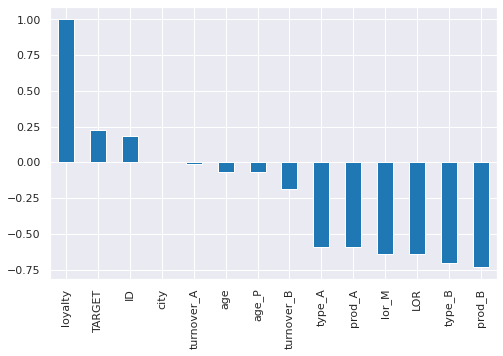

In [26]:
# Correlation
plt.figure(figsize=(8, 5))
cm = df.corr()
cm.nlargest(14, 'loyalty')['loyalty'].plot(kind='bar')

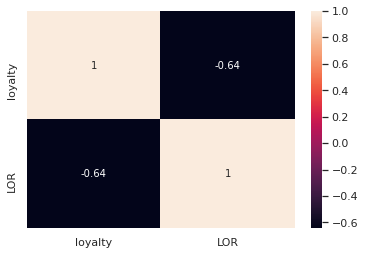

In [27]:
sns.heatmap((df[['loyalty', 'LOR']]).corr(), annot=True)

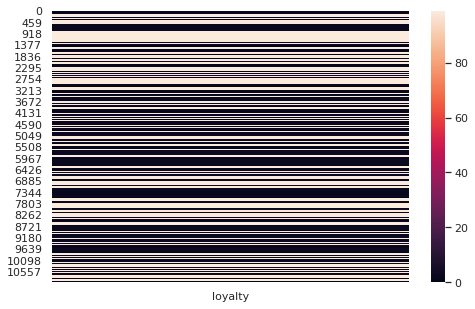

In [28]:
# 99 = unclassified (beige lines)
plt.figure(figsize=(8, 5))
sns.heatmap(df[['loyalty']])

### relation between loyalty and LOR 

#### Classified loyalty

In [29]:
classified_loyalty = df[df['loyalty'] < 99]

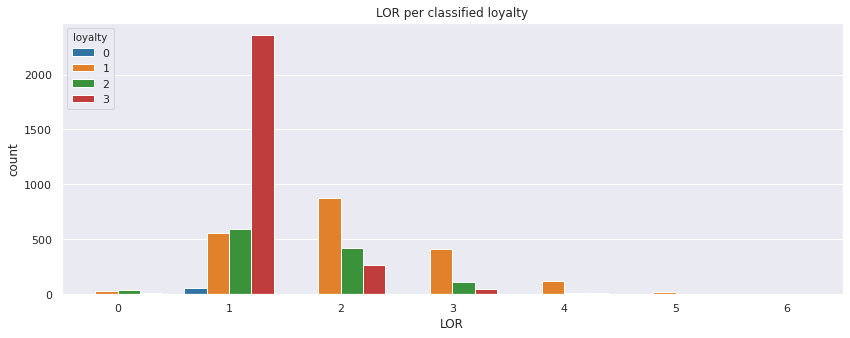

In [30]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x='LOR', hue='loyalty',data=classified_loyalty)
plt.title('LOR per classified loyalty')
plt.show()

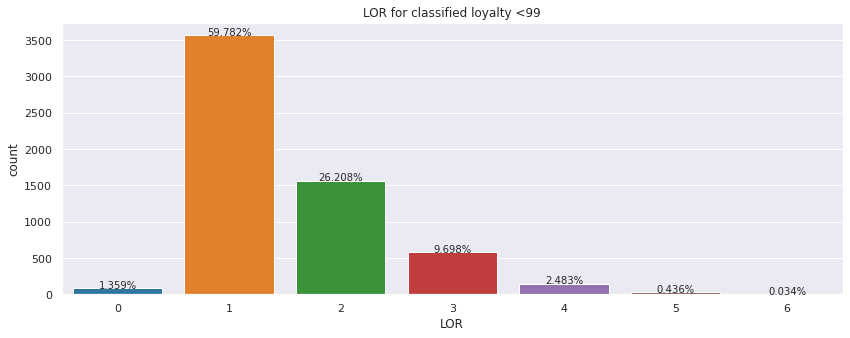

In [31]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x="LOR", data=classified_loyalty)
plt.title('LOR for classified loyalty <99')

total = len(classified_loyalty['LOR'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

#### Unclassified loyalty

In [32]:
unclassified_loyalty = df[df['loyalty'] == 99]

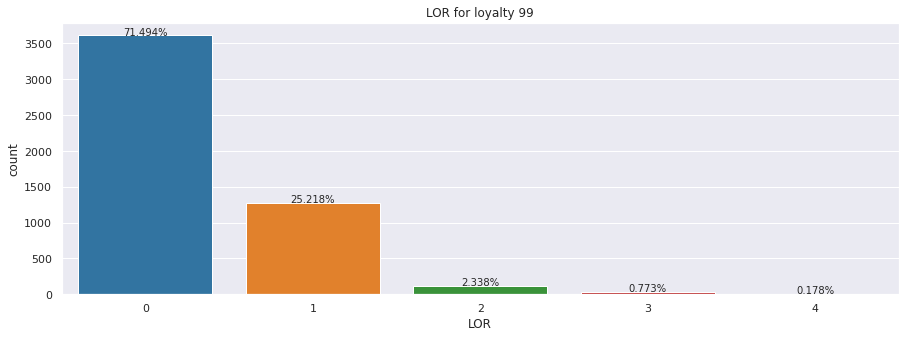

In [33]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x="LOR", data=unclassified_loyalty)
plt.title('LOR for loyalty 99')

total = len(unclassified_loyalty['LOR'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

* Most unclassified samples are LOR 0, unfortunatly there are no LOR 0 voor the classified and thus we can't impute based on that.

* For prod_B = 0, loyalty is only unclassified, so no imputation possible via prod_B. High correlation between loyalty and prod_B also caused because 70% unclassified is LOR 0 and LOR 0 are mainly the people not buying prod_B.
* Decided to drop the loyalty variable, to many unclassified and no good imputation possible.

In [34]:
df.shape

(11008, 15)

In [35]:
df = df.drop('loyalty', axis=1)

In [36]:
df.shape

(11008, 14)

## ID (after removing duplicate ID samples)

<b>~72%</b> of samples are target = 0 and ID smaller than 20000 

Text(0.5, 1.0, 'ID distribution')

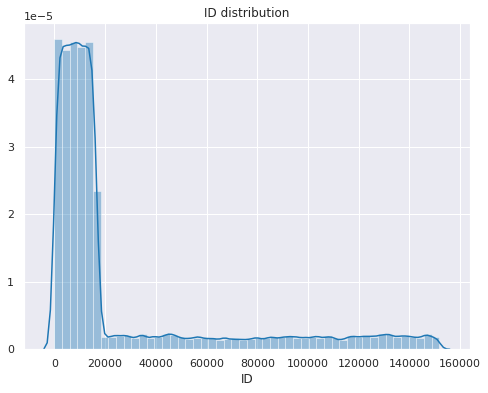

In [37]:
plt.figure(figsize=(8, 6))
sns.distplot(df['ID'])
plt.title('ID distribution')
# After removing duplicate ID's, majority still has low ID

### Target distribution ID

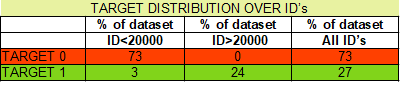

###  Isolating ID<20000

In [38]:
df_check_under = df[(df['ID'] < 20000)]
print(len(df_check_under)/len(df))

0.7619004360465116


###  Isolating ID>20000

In [39]:
df_check_above = df[(df['ID'] > 20000)]
print(len(df_check_above)/len(df))

0.23809956395348839


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


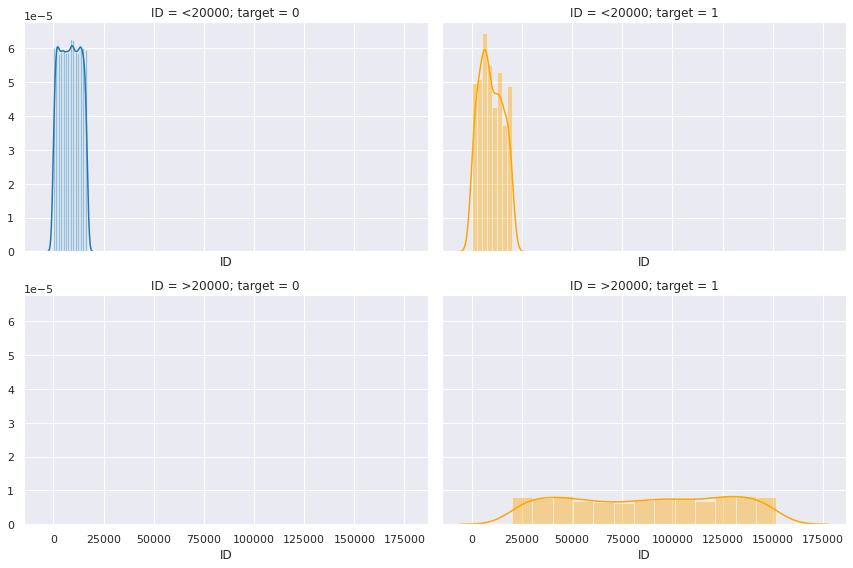

In [40]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, figsize=(12, 8), sharey=True,sharex=True)

sns.distplot(df_check_under[df_check_under['TARGET'] == 0]
             ['ID'], ax=ax1).set_title('ID = <20000; target = 0')
sns.distplot(df_check_under[df_check_under['TARGET'] == 1]
             ['ID'], ax=ax2,color='orange').set_title('ID = <20000; target = 1')
sns.distplot(df_check_above[df_check_above['TARGET'] == 0]
             ['ID'], ax=ax3).set_title('ID = >20000; target = 0')
sns.distplot(df_check_above[df_check_above['TARGET'] == 1]
             ['ID'], ax=ax4,color='orange').set_title('ID = >20000; target = 1')
fig.tight_layout()

## Age

* 22% of the samples are people with the age of 23   
* 20% of the samples are people with the age of 23 AND target = 0 
* 1.3% of the samples are people with the age of 23 AND target = 1  
* The mayoritygroup in the dataset is very unlikely to inscribe for TARGET
* TARGET = 1 mean age = 39.68 
* TARGET = 1 median age = 38.0

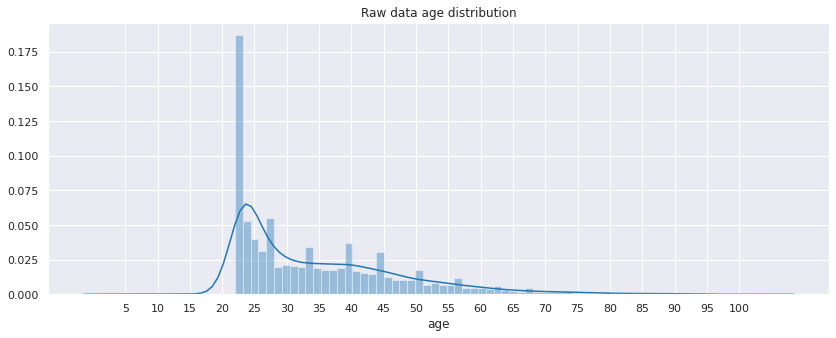

In [41]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(df['age'],bins=80)
plt.xticks(np.arange(min(df['age']), max(df['age'])+1, 5))
plt.title('Raw data age distribution')
plt.show()

### Statistics

In [42]:
import scipy.stats as sp

print("Mode: "+str(df['age'].mode()[0]))
print("Median: "+str(df['age'].median()))
print("Mean: "+str(np.round(df['age'].mean(), decimals=2)))
print("Skew: "+str(np.round(sp.skew(df['age']), decimals=2)))
print("Kurtosis: "+str(np.round(sp.kurtosis(df['age']), decimals=2)))
print("Min: "+str(df['age'].min()))
print("Max: "+str(df['age'].max()))
print("Range: "+str((df['age'].max())-(df['age'].min())))

Mode: 23
Median: 31.0
Mean: 34.85
Skew: 1.3
Kurtosis: 1.68
Min: 5
Max: 102
Range: 97


### Right skewed distribution

#### Effects of skewness

Real life distributions are usually skewed. If there are too much skewness in the data, then many statistical model don’t work but why.

So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance. There are statistical model that are robust to outlier like a Tree-based models but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.



#### Log transformation 

A log transformation can help to fit a very skewed distribution into a more Gaussian one. 

Won't do df['age'] = np.log(df['age']) yet! Will do it after analysis and right before modeling.

In [43]:
age_log = np.log(df['age'])

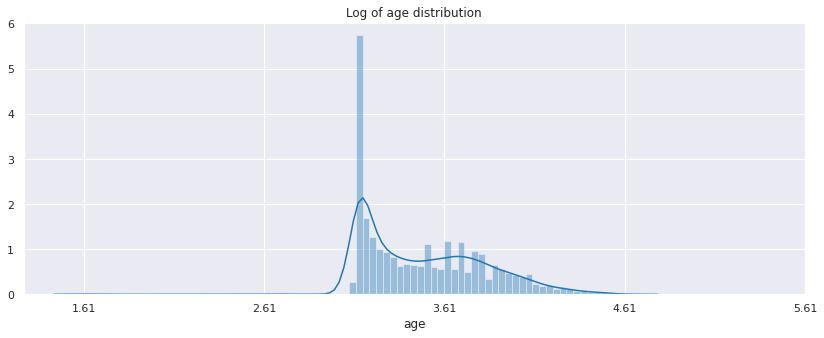

In [44]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(age_log,bins=80)
plt.xticks(np.arange(min(age_log), max(age_log)+1, 1))
plt.title('Log of age distribution')
plt.show()

### Distribution per target value

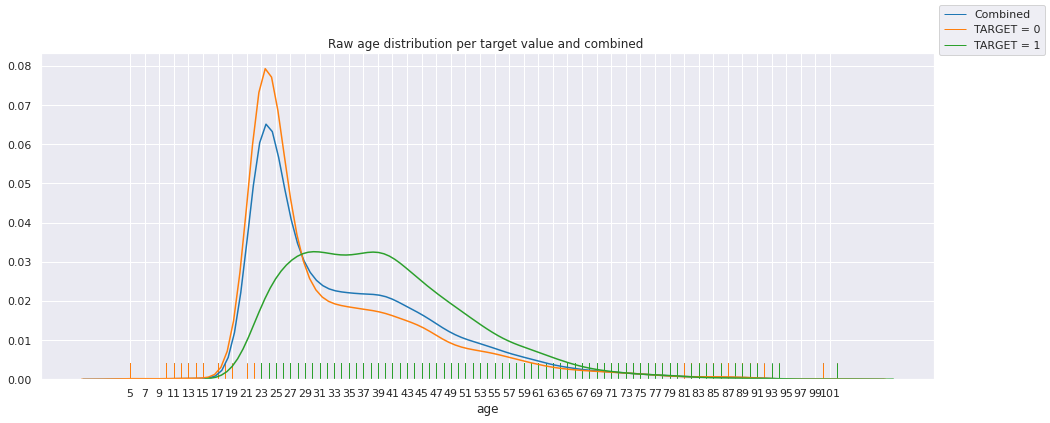

In [45]:
fig = plt.figure(figsize=(16, 6))
sns_plot = sns.distplot(df['age'], hist=False, rug=True).set_title('Age')
sns_plot = sns.distplot(df[df['TARGET'] == 0]['age'], hist=False, rug=True)
sns_plot = sns.distplot(df[df['TARGET'] == 1]['age'], hist=False, rug=True)
fig.legend(labels=['Combined',
                   'TARGET = 0',
                   'TARGET = 1'])
plt.title('Raw age distribution per target value and combined ')
plt.xticks(np.arange(min(df['age']), max(df['age'])+1, 2))
plt.show()
fig.tight_layout()

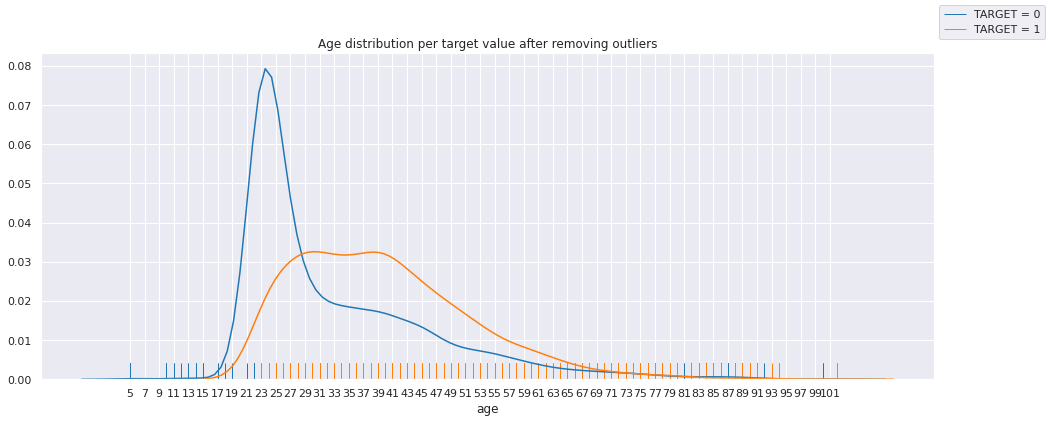

In [46]:
fig = plt.figure(figsize=(16, 6))
sns_plot = sns.distplot(df[df['TARGET'] == 0]['age'], hist=False, rug=True)
sns_plot = sns.distplot(df[df['TARGET'] == 1]['age'], hist=False, rug=True)
fig.legend(labels=['TARGET = 0',
                   'TARGET = 1'])
plt.title('Age distribution per target value after removing outliers')
plt.xticks(np.arange(min(df['age']), max(df['age'])+1, 2))
plt.show()

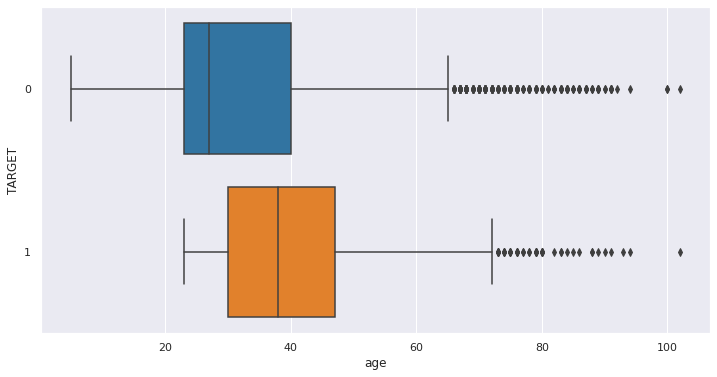

In [47]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="age", y="TARGET", data=df, orient="h")

## City 

* 98% clients city "2"
* Quasi constant variable
* Remove column

In [48]:
df.shape

(11008, 14)

In [49]:
df = df.drop('city', axis=1)

In [50]:
df.shape

(11008, 13)

## LOR 

Length of the relationship in years between the person and the insurance company

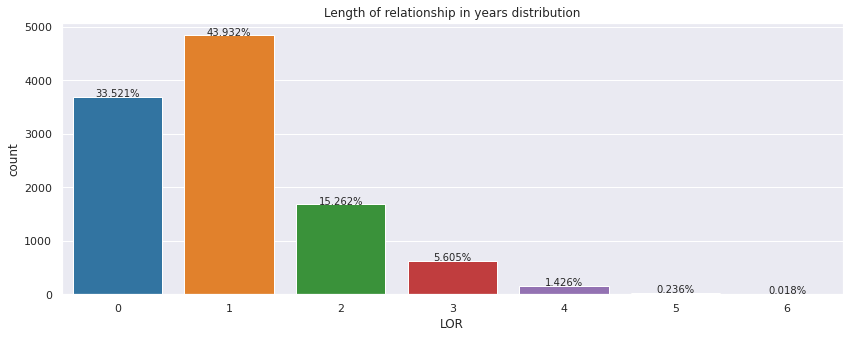

In [51]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(df['LOR'])
plt.title('Length of relationship in years distribution')

total = len(df['LOR'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

## Lor_M 

* ~duplicate with LOR
* Length of the relationship in months between the person and the insurance company
* For both lor_M and LOR we have 7 categories
* LOR has lower values, which are better for modeling later on
* Feedback:  als een export van de gegevens wordt gedaan wordt de LOR berekend.
* Remove lor_M column

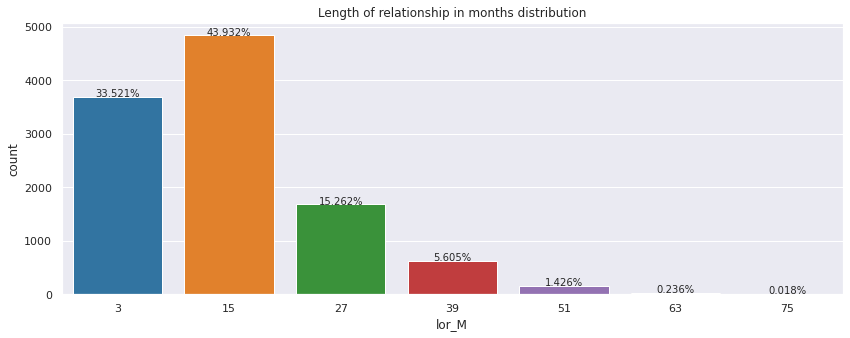

In [52]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(df['lor_M'])
plt.title('Length of relationship in months distribution')

total = len(df['lor_M'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

In [53]:
df.shape

(11008, 13)

In [54]:
df = df.drop(['lor_M'], axis=1)

In [55]:
df.shape

(11008, 12)

## prod_A

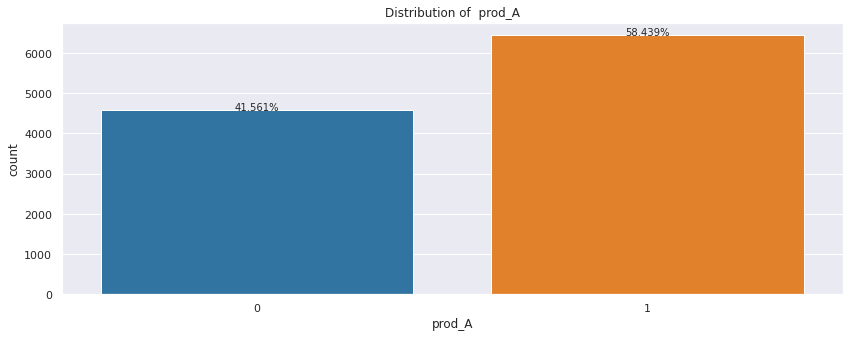

In [56]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x="prod_A", data=df)
plt.title('Distribution of  prod_A')

total = len(df['prod_A'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

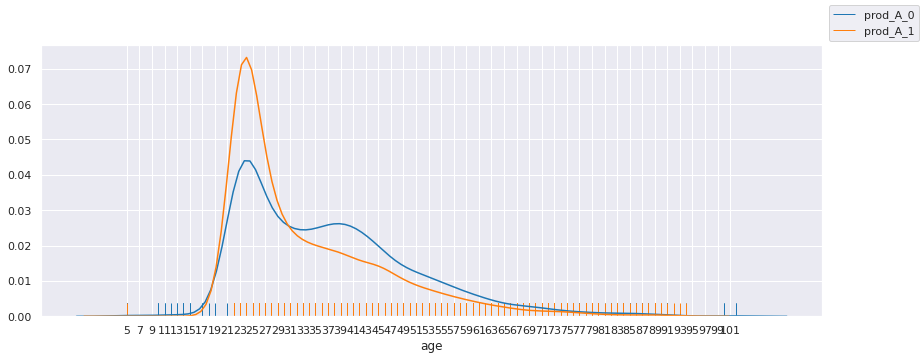

In [57]:
fig = plt.figure(figsize=(14, 5))
sns_plot = sns.distplot(df[df['prod_A'] == 0]['age'], hist=False, rug=True)
sns_plot = sns.distplot(df[df['prod_A'] == 1]['age'], hist=False, rug=True)
fig.legend(labels=['prod_A_0',
                   'prod_A_1'])
plt.xticks(np.arange(min(df['age']), max(df['age'])+1, 2))
plt.show()

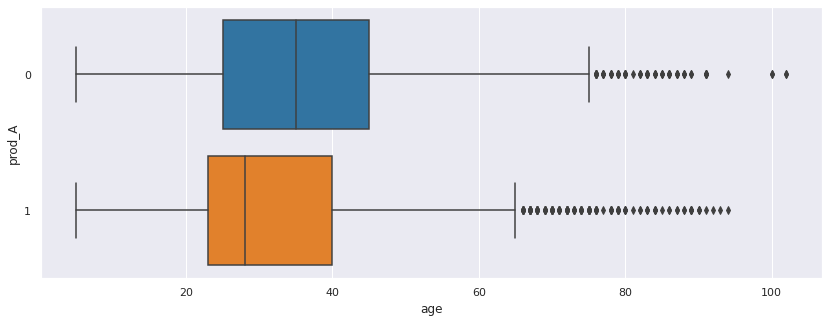

In [58]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="age", y="prod_A", data=df, orient="h")

## type_A 

* ~duplicate information about prod_A 
* type_A = 6 barely bought

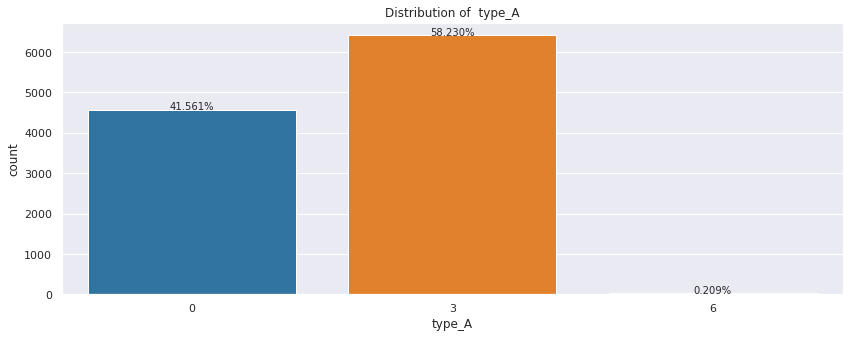

In [59]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x="type_A", data=df)
plt.title('Distribution of  type_A')

total = len(df['type_A'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

In [60]:
df.shape

(11008, 12)

In [61]:
df = df.drop('type_A', axis=1)

In [62]:
df.shape

(11008, 11)

## prod_B

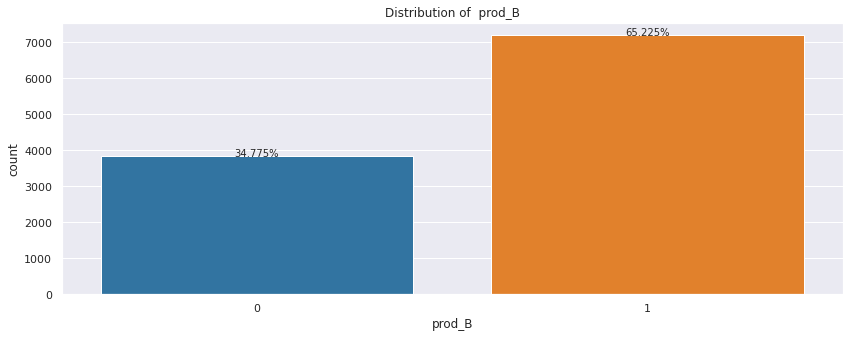

In [63]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x="prod_B", data=df)
plt.title('Distribution of  prod_B')

total = len(df['prod_B'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

## type_B 

* ~duplicate information about prod_B 
* type_A = 6 and 9 barely bought

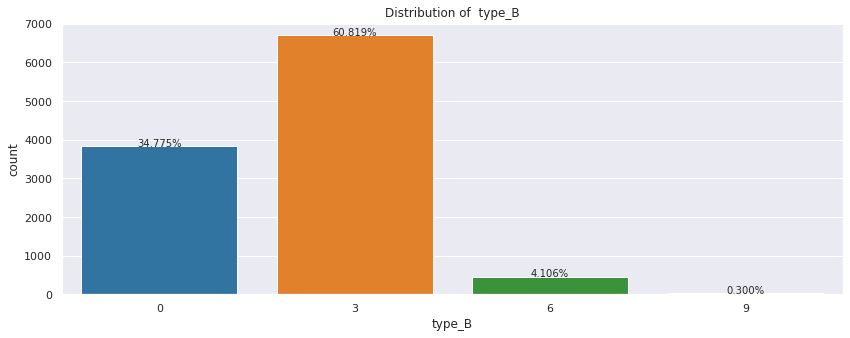

In [64]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x="type_B", data=df)
plt.title('Distribution of  type_B')

total = len(df['type_B'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

In [65]:
df.shape

(11008, 11)

In [66]:
# holds quasi the same distribution as prod_B, remove
df = df.drop('type_B', axis=1)

In [67]:
df.shape

(11008, 10)

## Turnover_A

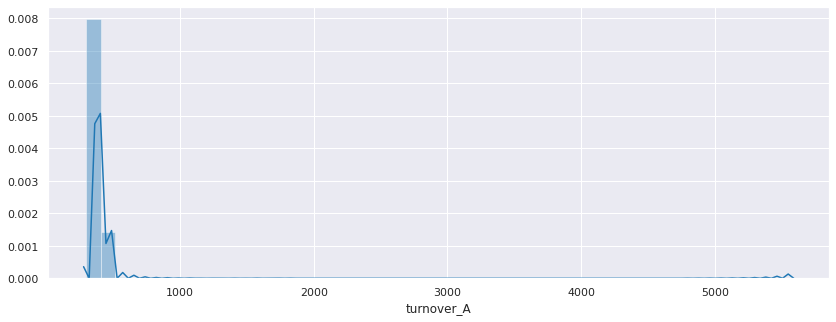

In [68]:
plt.figure(figsize=(14, 5))
sns.distplot(df['turnover_A'])

In [69]:
print("Mode: "+str(np.round(df['turnover_A'].mode()[0], decimals=2)))
print("Median: "+str(np.round(df['turnover_A'].median(), decimals=2)))
print("Mean: "+str(np.round(df['turnover_A'].mean(), decimals=2)))
print("Skew: "+str(np.round(sp.skew(df['turnover_A']), decimals=2)))
print("Kurtosis: "+str(np.round(sp.kurtosis(df['turnover_A']), decimals=2)))
print("Min: "+str(np.round(df['turnover_A'].min(), decimals=2)))
print("Max: "+str(np.round(df['turnover_A'].max(), decimals=2)))

Mode: 300.1
Median: 361.93
Mean: 372.33
Skew: 23.35
Kurtosis: 964.78
Min: 300.1
Max: 5568.78


In [70]:
df['turnover_A'].describe()

count    11008.000000
mean       372.332403
std         96.685932
min        300.095909
25%        332.229899
50%        361.930298
75%        391.567662
max       5568.784139
Name: turnover_A, dtype: float64

* 75% of the turnover_A < ~392

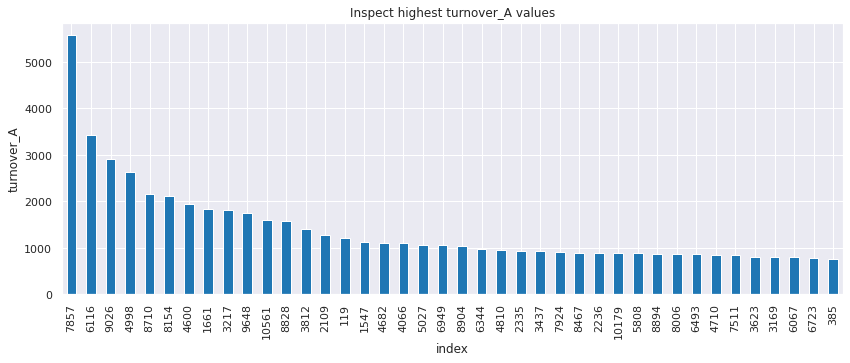

In [71]:
# plot 40 highest values to check if valid outliers
plt.figure(figsize=(14, 5))
df['turnover_A'].sort_values(ascending=False).head(40).plot(kind='bar')
plt.xlabel('index')
plt.ylabel('turnover_A')
plt.title('Inspect highest turnover_A values')
plt.show()

* Looks like they are valid outliers (inverse exponential drop in turnover_A).

### Effect of removing turnover A > 400

In [72]:
df_turnover_A_reduced_plot = df.drop(df[df['turnover_A'] > 400].index)

In [73]:
print("Mode: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].mode()[0], decimals=2)))
print("Median: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].median(), decimals=2)))
print("Mean: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].mean(), decimals=2)))
print("Skew: "+str(np.round(sp.skew(df_turnover_A_reduced_plot['turnover_A']), decimals=2)))
print("Kurtosis: "+str(np.round(sp.kurtosis(df_turnover_A_reduced_plot['turnover_A']), decimals=2)))
print("Min: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].min(), decimals=2)))
print("Max: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].max(), decimals=2)))

Mode: 300.1
Median: 351.54
Mean: 351.22
Skew: -0.03
Kurtosis: -1.18
Min: 300.1
Max: 400.0


* Mean and median closer to each other
* Distribution closer to normal (see kurt and skew) -> model works best with normal dist

In [74]:
df_turnover_A_reduced_plot['turnover_A'].describe()

count    9080.000000
mean      351.220479
std        28.544612
min       300.095909
25%       326.733590
50%       351.542267
75%       375.964745
max       399.999115
Name: turnover_A, dtype: float64

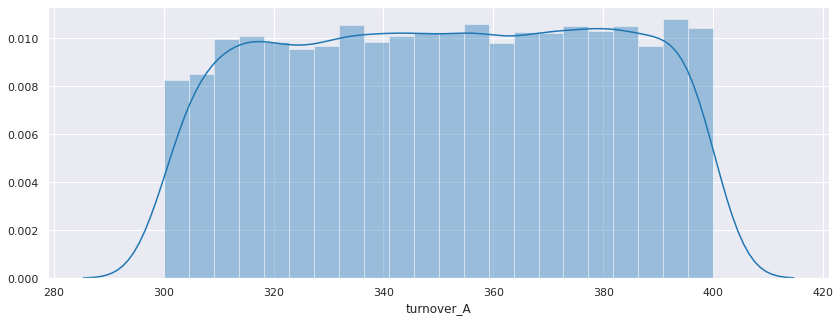

In [75]:
plt.figure(figsize=(14, 5))
sns.distplot(df_turnover_A_reduced_plot['turnover_A'])
plt.show()

In [76]:
df = df.drop(df[df['turnover_A'] > 400].index)

## Turnover_B

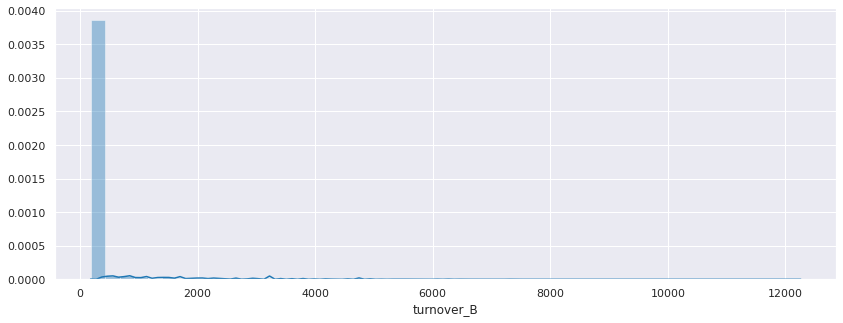

In [77]:
plt.figure(figsize=(14, 5))
sns.distplot(df['turnover_B'])
plt.show()

In [78]:
print("Mode: "+str(np.round(df['turnover_B'].mode()[0], decimals=2)))
print("Median: "+str(np.round(df['turnover_B'].median(), decimals=2)))
print("Mean: "+str(np.round(df['turnover_B'].mean(), decimals=2)))
print("Skew: "+str(np.round(sp.skew(df['turnover_B']), decimals=2)))
print("Kurtosis: "+str(np.round(sp.kurtosis(df['turnover_B']), decimals=2)))
print("Min: "+str(np.round(df['turnover_B'].min(), decimals=2)))
print("Max: "+str(np.round(df['turnover_B'].max(), decimals=2)))

Mode: 191.96
Median: 232.31
Mean: 346.97
Skew: 7.21
Kurtosis: 73.78
Min: 191.96
Max: 12249.08


In [79]:
df['turnover_B'].describe()

count     9080.000000
mean       346.972077
std        547.847998
min        191.962852
25%        216.842613
50%        232.309553
75%        246.995845
max      12249.084770
Name: turnover_B, dtype: float64

* 75% of the turnover_B < ~252

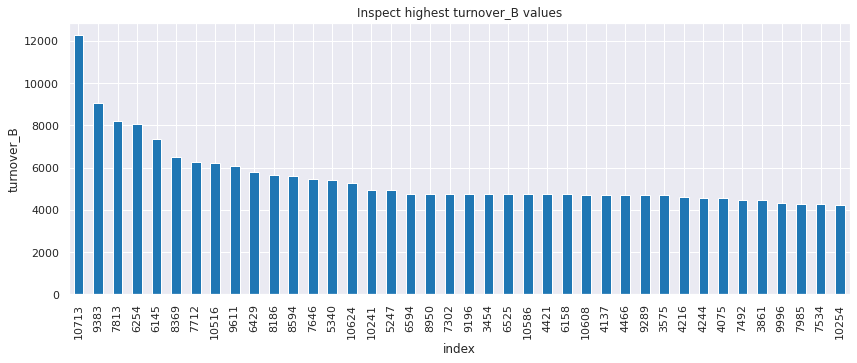

In [80]:
# plot 40 highest values to check if outliers are valid
plt.figure(figsize=(14, 5))
df['turnover_B'].sort_values(ascending=False).head(40).plot(kind='bar')
plt.xlabel('index')
plt.ylabel('turnover_B')
plt.title('Inspect highest turnover_B values')
plt.show()

### Effect of removing both turnover  B > 260 and A > 400 

* Temporarily df 

In [81]:
df_TO_A_B_reduced_plot = df_turnover_A_reduced_plot.drop(
    df_turnover_A_reduced_plot[df_turnover_A_reduced_plot['turnover_B'] >= 260].index)

In [82]:
print("Mode: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].mode()[0], decimals=2)))
print("Median: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].median(), decimals=2)))
print("Mean: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].mean(), decimals=2)))
print("Skew: "+str(np.round(sp.skew(df_TO_A_B_reduced_plot['turnover_B']), decimals=2)))
print("Kurtosis: "+str(np.round(sp.kurtosis(df_TO_A_B_reduced_plot['turnover_B']), decimals=2)))
print("Min: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].min(), decimals=2)))
print("Max: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].max(), decimals=2)))

Mode: 191.96
Median: 227.15
Mean: 226.99
Skew: 0.01
Kurtosis: -1.08
Min: 191.96
Max: 259.99


* Improved skew and kurt and mean closer to median

In [83]:
df_TO_A_B_reduced_plot['turnover_B'].describe()

count    7579.000000
mean      226.990508
std        15.121378
min       191.962852
25%       214.301760
50%       227.148011
75%       239.687572
max       259.994027
Name: turnover_B, dtype: float64

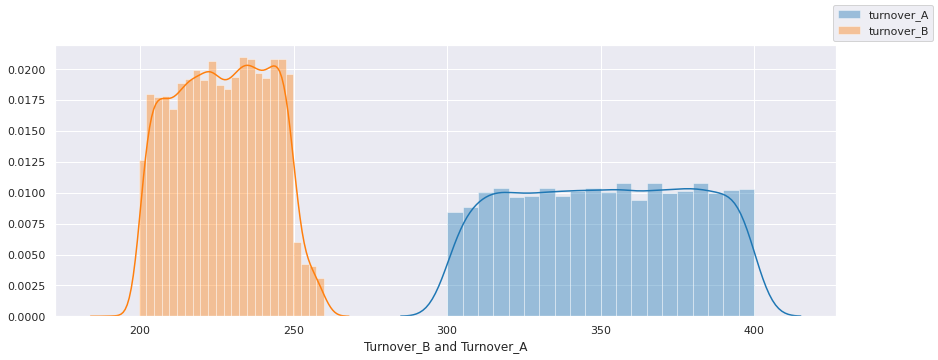

In [84]:
fig = plt.figure(figsize=(14, 5))
sns_plot = sns.distplot(df_TO_A_B_reduced_plot['turnover_A'])
sns_plot = sns.distplot(df_TO_A_B_reduced_plot['turnover_B'])
fig.legend(labels=['turnover_A', 'turnover_B'])
plt.xlabel('Turnover_B and Turnover_A')
plt.show()
fig.tight_layout()

###  Impact on samples

* For removing both turnover_A and _B tail

In [85]:
df.shape

(9080, 10)

In [86]:
df_TO_A_B_reduced_plot.shape

(7579, 10)

In [87]:
df = df.drop(df[df['turnover_B'] >= 260].index)

In [88]:
df.shape

(7579, 10)

## Contract

In [89]:
df.shape

(7579, 10)

In [90]:
df['contract'].value_counts()

2    7579
Name: contract, dtype: int64

Constant variable

In [91]:
df = df.drop(['contract'], axis=1)

In [92]:
df.shape

(7579, 9)

## Age_P 

* Duplicate of age (confirmed by insurance company)

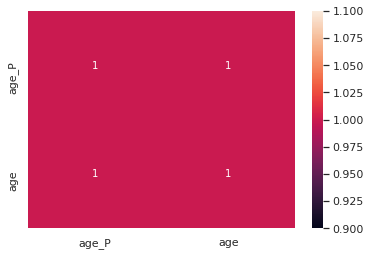

In [93]:
sns.heatmap(df[['age_P', 'age']].corr(), annot=True)

In [94]:
df.shape

(7579, 9)

Duplicate of age

In [95]:
df = df.drop('age_P', axis=1)

In [96]:
df.shape

(7579, 8)

## Overview per variable

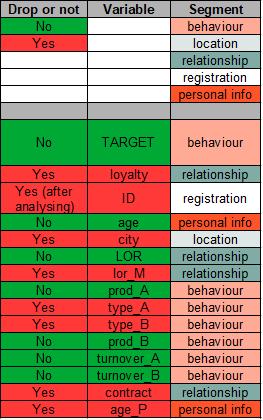

### Pairplots

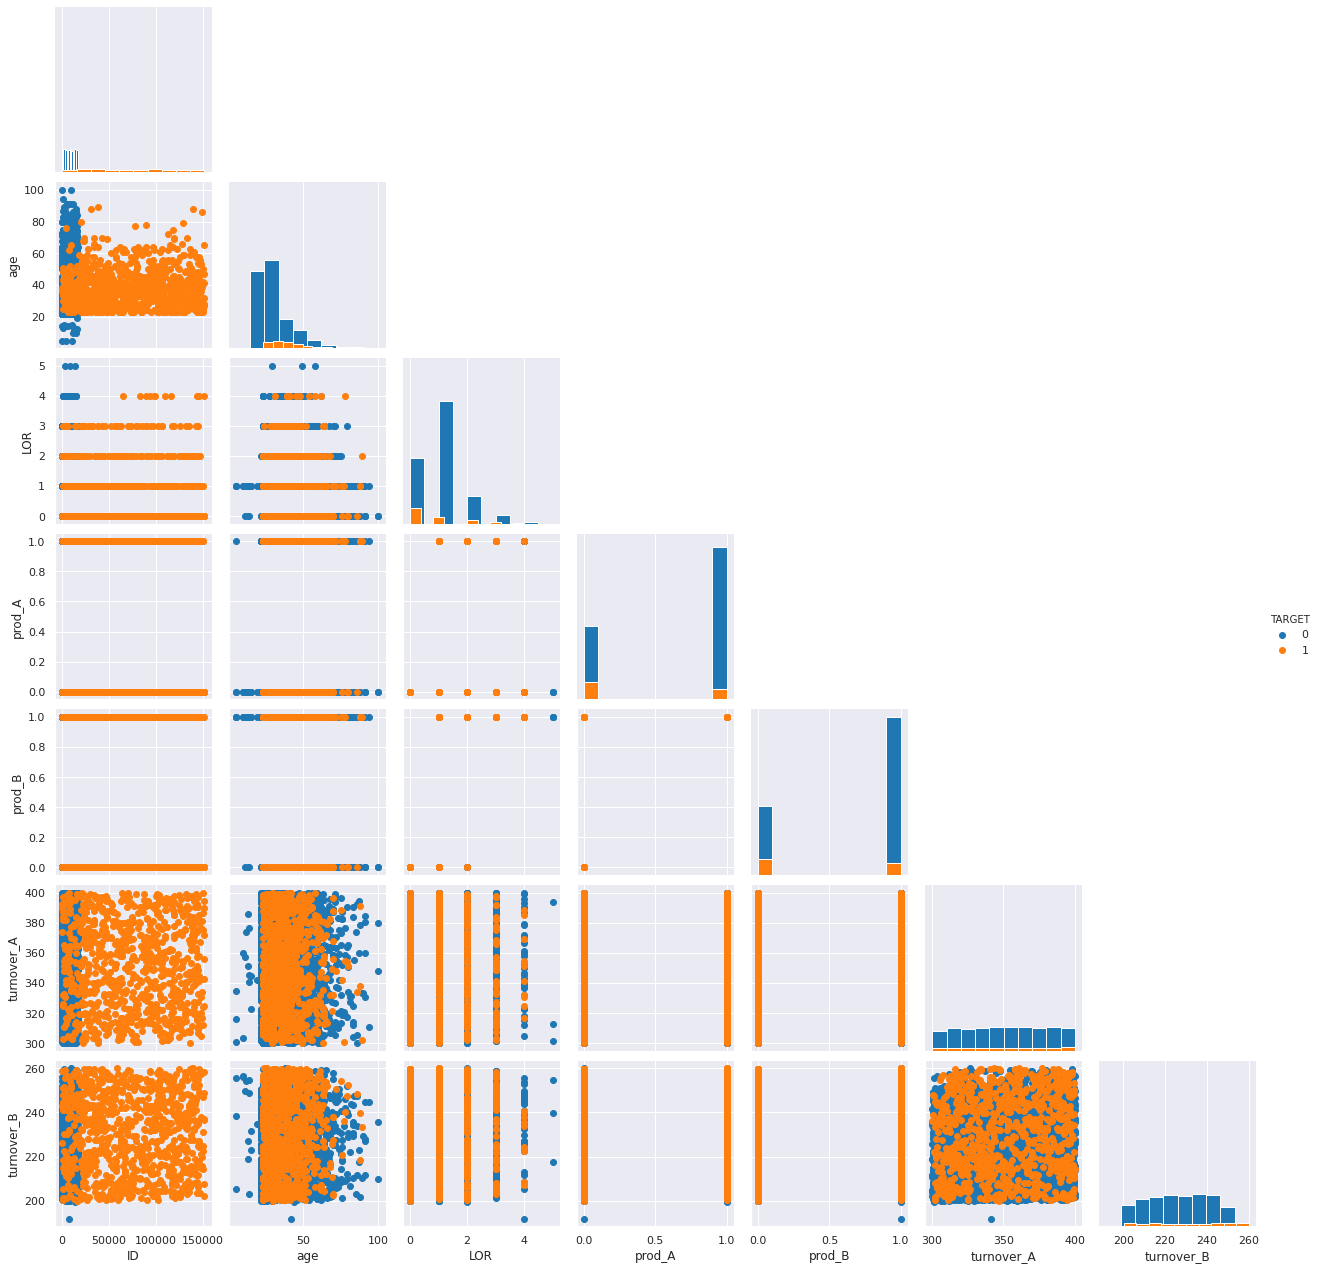

In [97]:
g = sns.PairGrid(df, hue='TARGET', corner=True)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [98]:
df.head()

,TARGET,ID,age,LOR,prod_A,prod_B,turnover_A,turnover_B
11,1,631,36,2,1,1,373.652449,243.133339
12,1,653,38,0,0,0,389.783521,258.624804
13,1,669,36,0,0,0,392.346320,226.288709
15,1,731,51,1,1,1,381.603623,250.961389
18,1,940,30,0,0,0,383.709403,218.652892


In [99]:
target_zero = df[df['TARGET'] == 0]
target_one = df[df['TARGET'] == 1]

# Analyze, identify patterns, and explore the data

* "Knowing your data isn't the most difficult thing in data science, but it is time-consuming."
* "It's easy to overlook this initial step and jump too soon into the water. Learn how to swim before jumping into the water."

In order to understand the data, we can look at each variable and try to understand their meaning and relevance to the problem.

1. <b>Univariable study</b>. Tocus on the dependent variable ('TARGET') and try to know a little bit more about it.
2. <b>Multivariate study</b>. Ttry to understand how the dependent variable and independent variables relate.


## TARGET

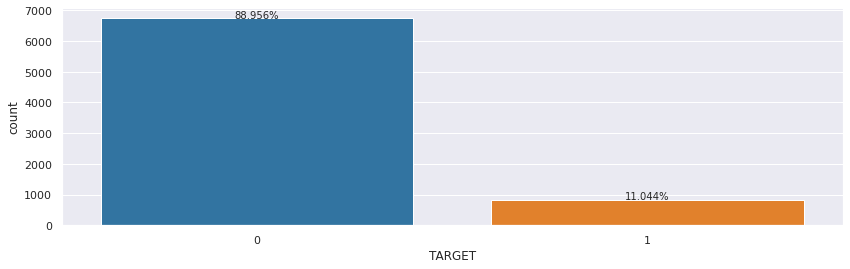

In [100]:
fig = plt.figure(figsize=(14, 4))
ax = sns.countplot(x="TARGET", data=df)
total = len(df['TARGET'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

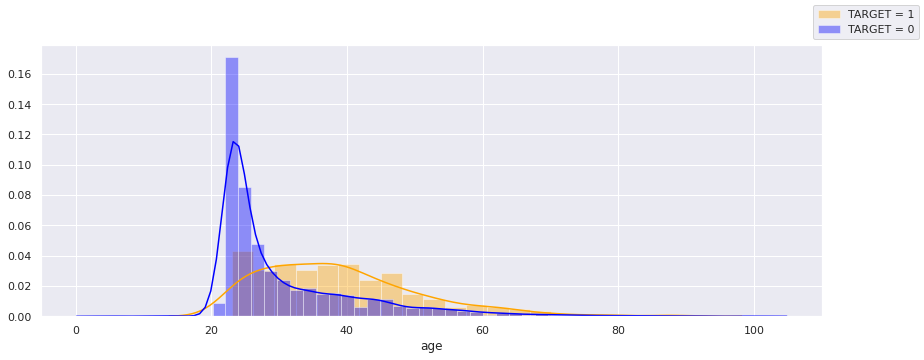

In [101]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(target_one['age'], color='orange')
sns.distplot(target_zero['age'], color='blue')
fig.legend(labels=['TARGET = 1', 'TARGET = 0'])
plt.show()
fig.tight_layout()

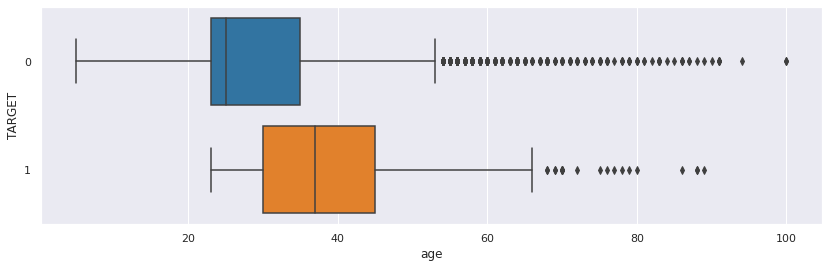

In [102]:
fig = plt.figure(figsize=(14, 4))
ax = sns.boxplot(x="age", y="TARGET", data=df, orient="h")

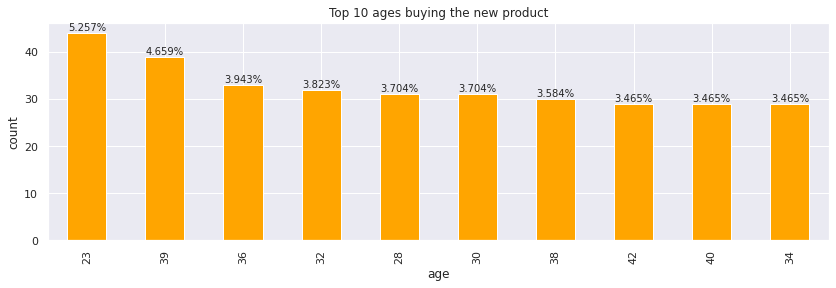

In [103]:
fig = plt.figure(figsize=(14, 4))
ax = df[df['TARGET'] == 1]['age'].value_counts().head(10).plot(kind='bar',color='orange')
total = len(df[df['TARGET'] == 1]['age'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('Top 10 ages buying the new product')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

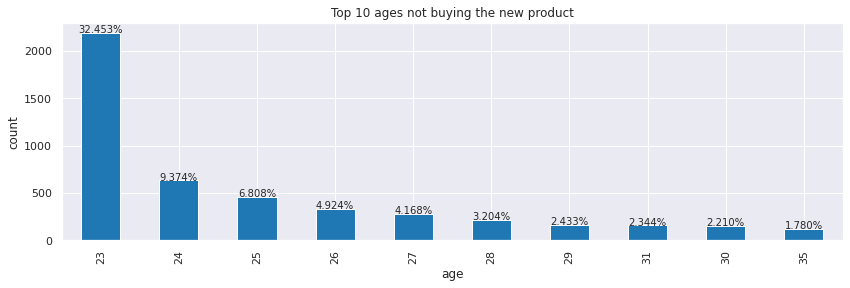

In [104]:
fig = plt.figure(figsize=(14, 4))
ax = df[df['TARGET'] == 0]['age'].value_counts().head(10).plot(kind='bar')
total = len(df[df['TARGET'] == 0]['age'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('Top 10 ages not buying the new product')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

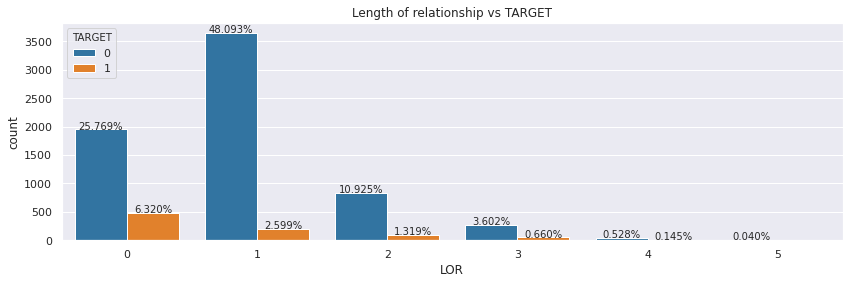

In [105]:
fig = plt.figure(figsize=(14, 4))
ax = sns.countplot(df['LOR'], hue=df['TARGET'])
total = len(df['LOR'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('Length of relationship vs TARGET')
plt.show()

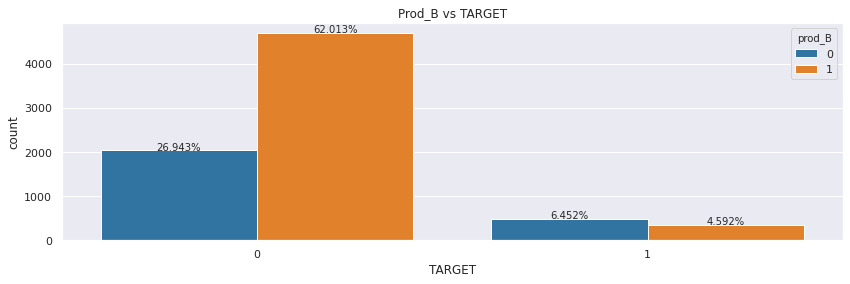

In [106]:
fig = plt.figure(figsize=(14, 4))
ax = sns.countplot(df['TARGET'], hue=df['prod_B'])
total = len(df['TARGET'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('Prod_B vs TARGET')
plt.show()

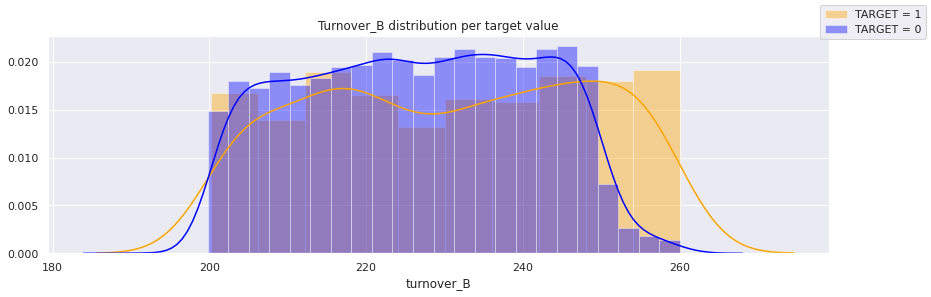

In [107]:
fig = plt.figure(figsize=(14, 4))
sns.distplot(target_one['turnover_B'], color='orange')
sns.distplot(target_zero['turnover_B'], color='blue')
fig.legend(labels=['TARGET = 1', 'TARGET = 0'])

plt.title('Turnover_B distribution per target value')
plt.show()

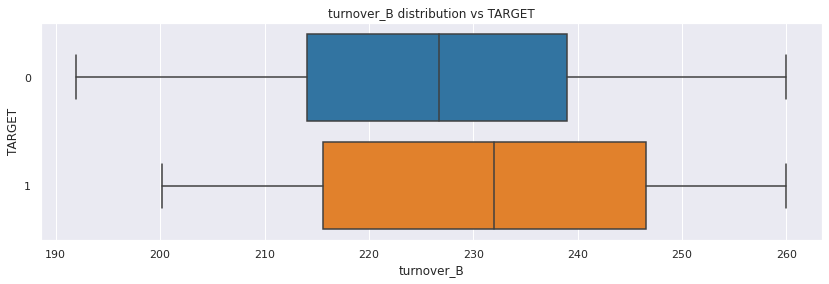

In [108]:
fig = plt.figure(figsize=(14, 4))
ax = sns.boxplot(x="turnover_B", y="TARGET",
                 data=df, orient="h")
plt.title('turnover_B distribution vs TARGET')
plt.show()

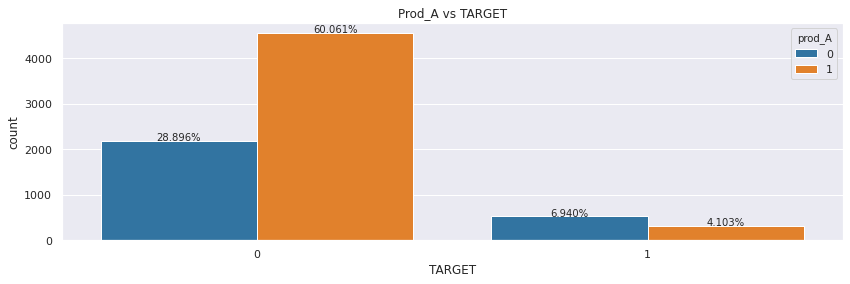

In [109]:
fig = plt.figure(figsize=(14, 4))
ax = sns.countplot(df['TARGET'], hue=df['prod_A'])
total = len(df['TARGET'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('Prod_A vs TARGET')
plt.show()

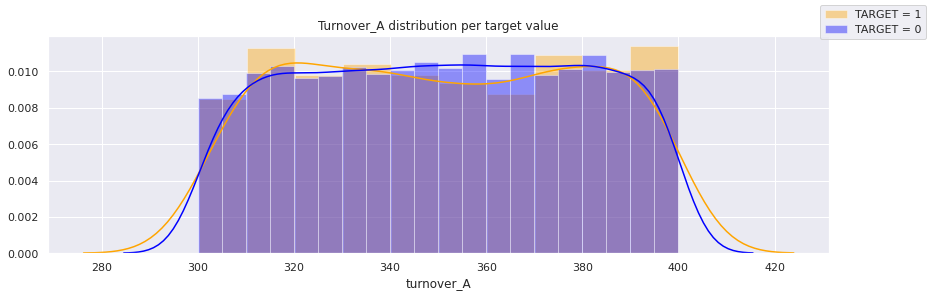

In [110]:
fig = plt.figure(figsize=(14, 4))
sns.distplot(target_one['turnover_A'], color='orange')
sns.distplot(target_zero['turnover_A'], color='blue')
fig.legend(labels=['TARGET = 1', 'TARGET = 0'])
plt.title('Turnover_A distribution per target value')
plt.show()

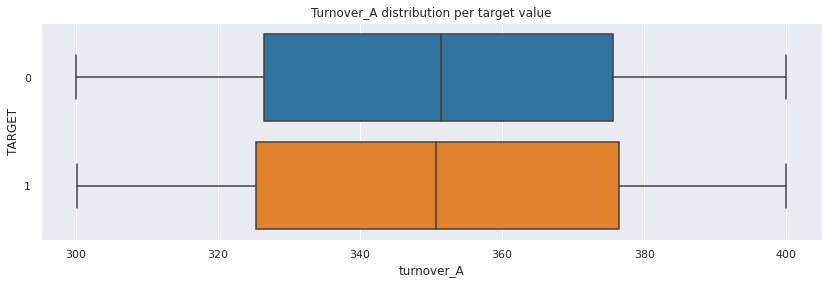

In [111]:
fig = plt.figure(figsize=(14, 4))
ax = sns.boxplot(x="turnover_A", y="TARGET",
                 data=df, orient="h")

plt.title('Turnover_A distribution per target value')
plt.show()

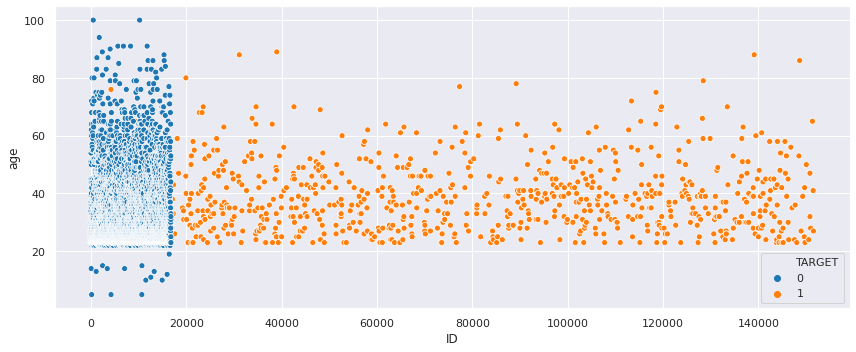

In [112]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(x='ID', y='age', data=df, hue='TARGET')
fig.tight_layout()


* Clients with an ID<20000 almost never buy the target.
* Only data where target = 0 is for ID<20000
* You can say, why not drop ID column all along? But I look into it for perhaps feature engineering/extra information.

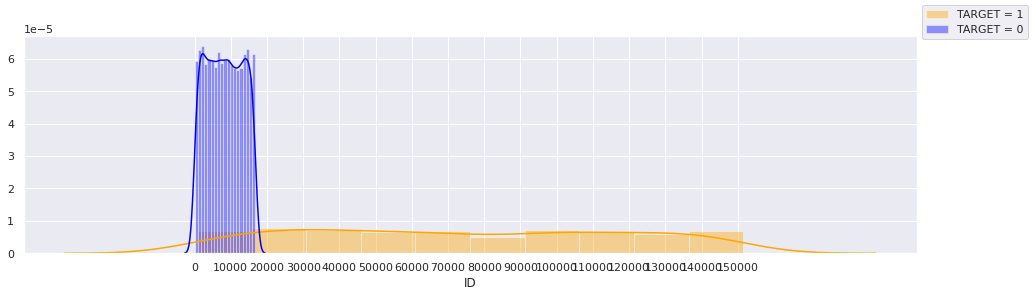

In [113]:
fig = plt.figure(figsize=(16, 4))
sns.distplot(target_one['ID'], color='orange')
sns.distplot(target_zero['ID'], color='blue')
fig.legend(labels=['TARGET = 1', 'TARGET = 0'])
plt.xticks(np.arange(min(df['ID'])-1, max(df['ID']), 10000))
plt.show()

###  Isolating ID<20000 and ID>20000

In [114]:
df_lower_id = df[(df['ID'] < 20000)]
df_higher_id = df[(df['ID'] > 20000)]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


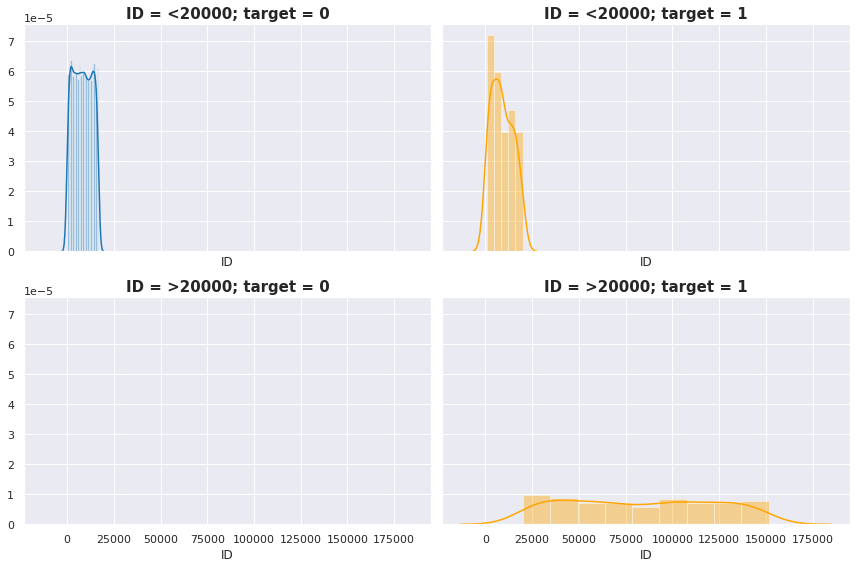

In [115]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, figsize=(12, 8), sharey=True,sharex=True)

ax1 = sns.distplot(df_lower_id[df_lower_id['TARGET'] == 0]['ID'], ax=ax1).set_title(
    'ID = <20000; target = 0', fontweight="bold", size=15)
ax2 = sns.distplot(df_lower_id[df_lower_id['TARGET'] == 1]['ID'], color='orange', ax=ax2).set_title(
    'ID = <20000; target = 1', fontweight="bold", size=15)
ax3 = sns.distplot(df_higher_id[df_higher_id['TARGET'] == 0]['ID'], ax=ax3).set_title(
    'ID = >20000; target = 0', fontweight="bold", size=15)
ax4 = sns.distplot(df_higher_id[df_higher_id['TARGET'] == 1]['ID'], color='orange', ax=ax4).set_title(
    'ID = >20000; target = 1', fontweight="bold", size=15)
fig.tight_layout()

## ID

### age 0 < ID < 20000

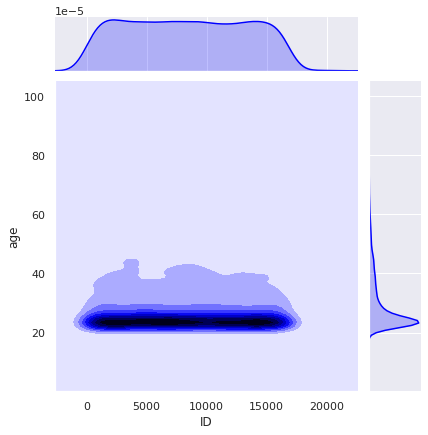

In [116]:
sns.jointplot(x='ID', y='age', data=df_lower_id,
              color='blue', kind='kde')

### age 20000 < ID < 175000

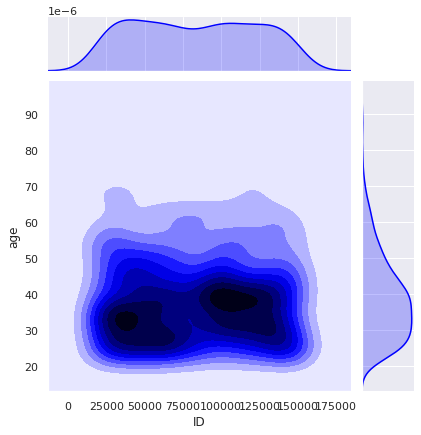

In [117]:
sns.jointplot(x='ID', y='age', data=df_higher_id,
              color='blue', kind='kde')

## prod_A

In [118]:
prod_A_zero = df[df['prod_A'] == 0]
prod_A_one = df[df['prod_A'] == 1]

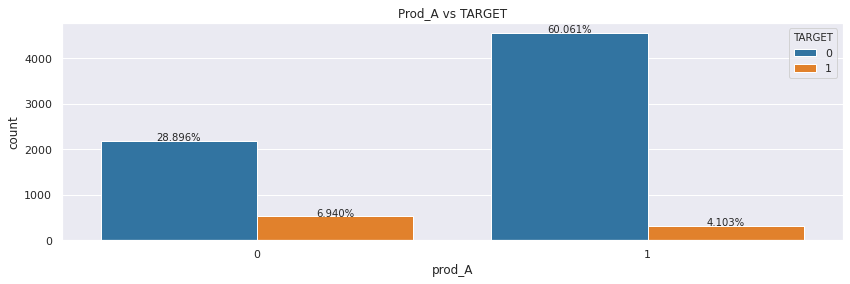

In [119]:
fig = plt.figure(figsize=(14, 4))
ax = sns.countplot(df['prod_A'], hue=df['TARGET'])
total = len(df['prod_A'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('Prod_A vs TARGET')
plt.show()

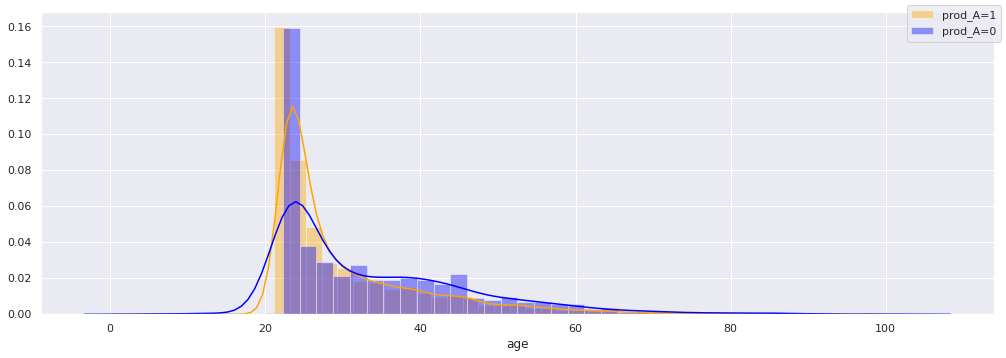

In [120]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(prod_A_one['age'], color='orange',bins=44)
sns.distplot(prod_A_zero['age'], color='blue',bins=44)
fig.legend(labels=['prod_A=1', 'prod_A=0'])
fig.tight_layout()

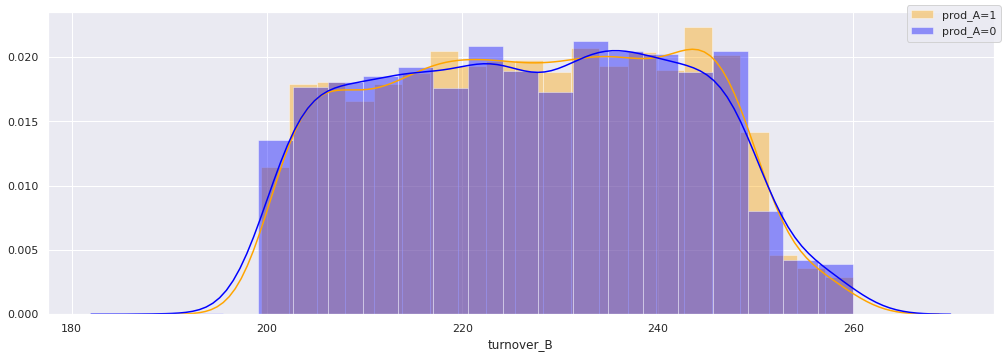

In [121]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(prod_A_one['turnover_B'], color='orange')
sns.distplot(prod_A_zero['turnover_B'], color='blue')
fig.legend(labels=['prod_A=1', 'prod_A=0'])
fig.tight_layout()

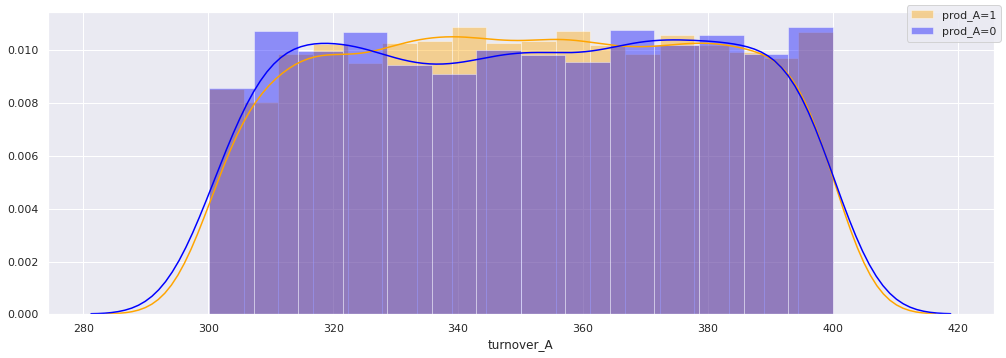

In [122]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(prod_A_one['turnover_A'], color='orange')
sns.distplot(prod_A_zero['turnover_A'], color='blue')
fig.legend(labels=['prod_A=1', 'prod_A=0'])
fig.tight_layout()

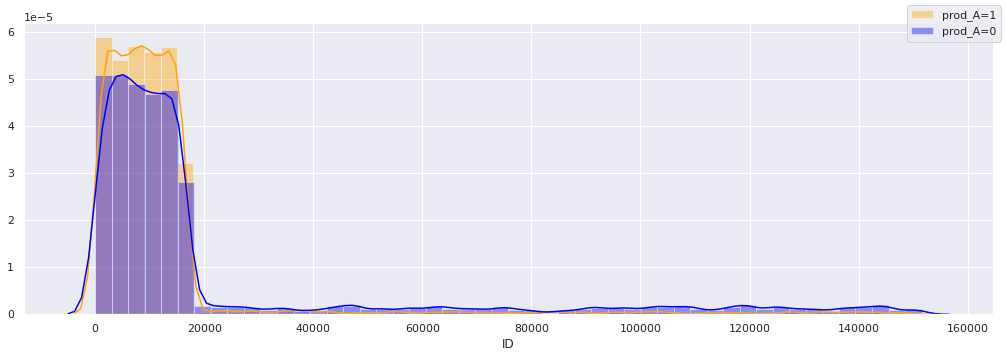

In [123]:
fig=plt.figure(figsize=(14, 5))
sns.distplot(prod_A_one['ID'], color='orange')
sns.distplot(prod_A_zero['ID'], color='blue')
fig.legend(labels=['prod_A=1', 'prod_A=0'])
fig.tight_layout()

## prod_B

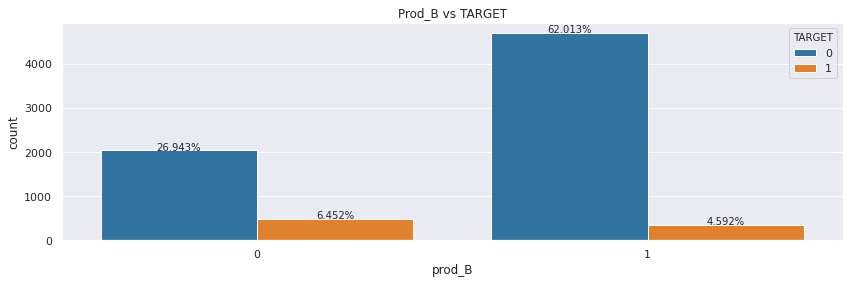

In [124]:
fig = plt.figure(figsize=(14, 4))
ax = sns.countplot(df['prod_B'], hue=df['TARGET'])
total = len(df['prod_B'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('Prod_B vs TARGET')
plt.show()

In [125]:
prod_B_zero = df[df['prod_B'] == 0]
prod_B_one = df[df['prod_B'] == 1]

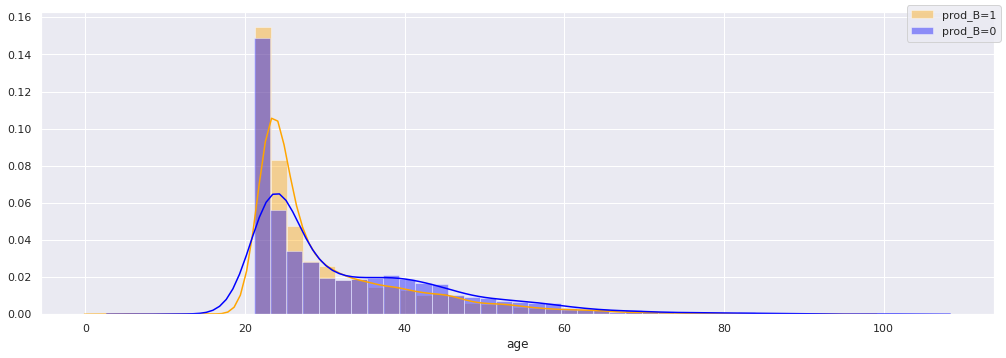

In [126]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(prod_B_one['age'], color='orange',bins=44)
sns.distplot(prod_B_zero['age'], color='blue',bins=44)
fig.legend(labels=['prod_B=1', 'prod_B=0'])
fig.tight_layout()

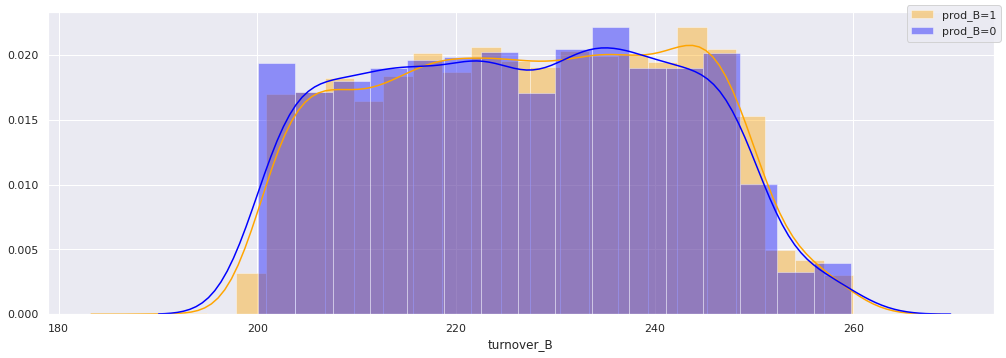

In [127]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(prod_B_one['turnover_B'], color='orange')
sns.distplot(prod_B_zero['turnover_B'], color='blue')
fig.legend(labels=['prod_B=1', 'prod_B=0'])
fig.tight_layout()

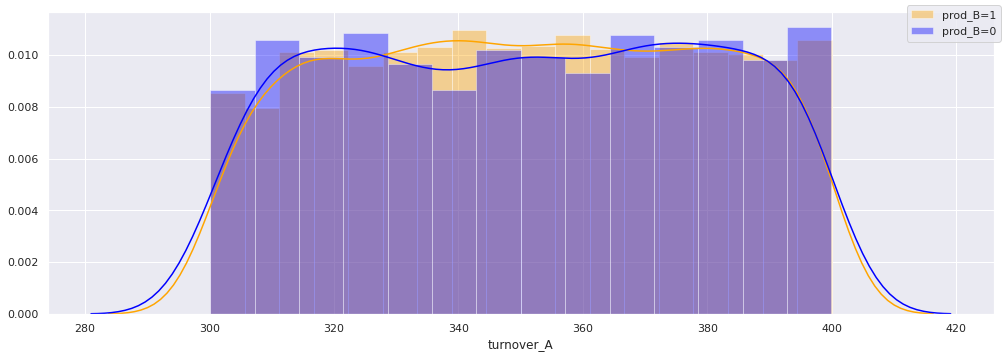

In [128]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(prod_B_one['turnover_A'], color='orange')
sns.distplot(prod_B_zero['turnover_A'], color='blue')
fig.legend(labels=['prod_B=1', 'prod_B=0'])
fig.tight_layout()

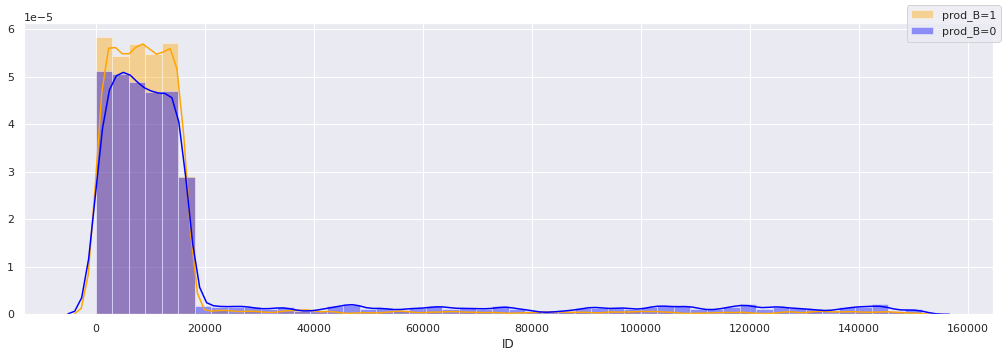

In [129]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(prod_B_one['ID'], color='orange')
sns.distplot(prod_B_zero['ID'], color='blue')
fig.legend(labels=['prod_B=1', 'prod_B=0'])
fig.tight_layout()

## turnover_A

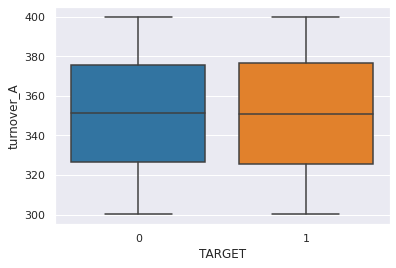

In [130]:
sns.boxplot(x='TARGET', y='turnover_A', data=df)

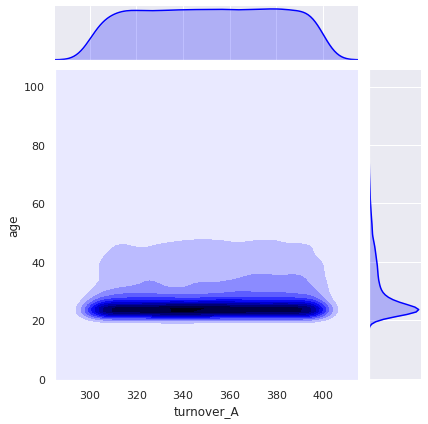

In [131]:
sns.jointplot(x='turnover_A', y='age',
              data=df, color='blue', kind='kde')

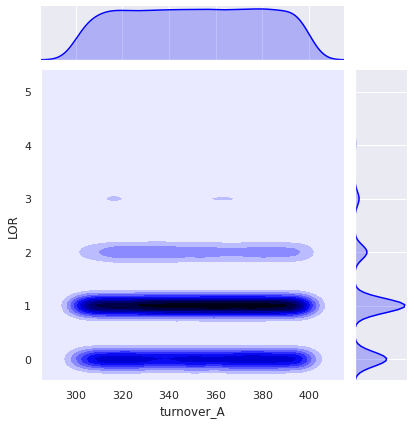

In [132]:
sns.jointplot(x='turnover_A', y='LOR',
              data=df, color='blue', kind='kde')

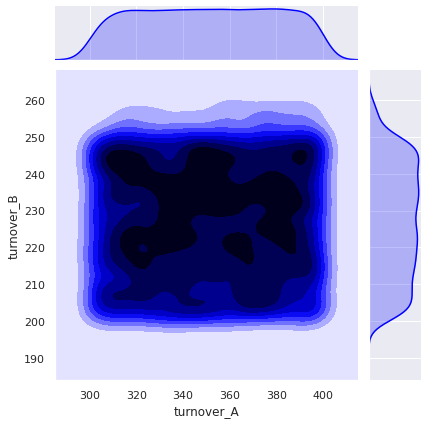

In [133]:
sns.jointplot(x='turnover_A', y='turnover_B',
              data=df, color='blue', kind='kde')

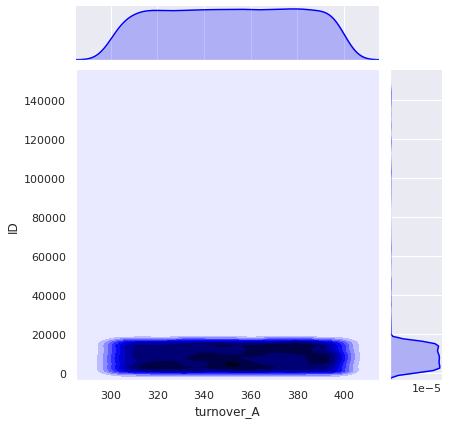

In [134]:
sns.jointplot(x='turnover_A', y='ID', data=df,
              color='blue', kind='kde')

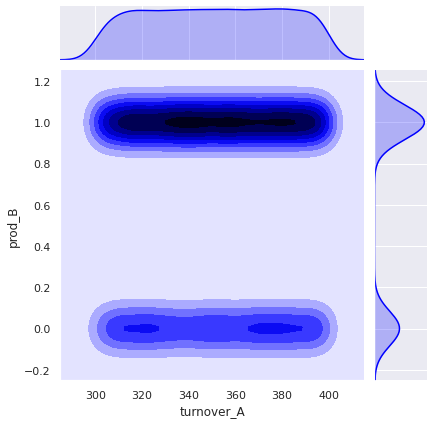

In [135]:
sns.jointplot(x='turnover_A', y='prod_B',
              data=df, color='blue', kind='kde')

##  turnover_B

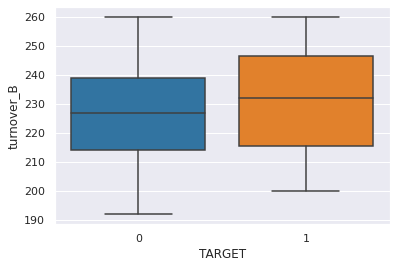

In [136]:
sns.boxplot(x='TARGET', y='turnover_B', data=df)

* Median for target = 1

In [137]:
df[df['TARGET'] == 1]['turnover_B'].median()

232.023709

* Median for target = 0

In [138]:
df[df['TARGET'] == 0]['turnover_B'].median()

226.73522635

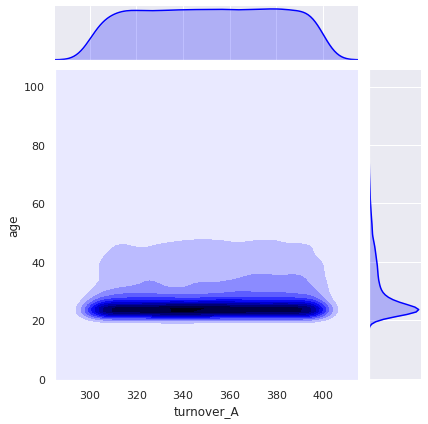

In [139]:
sns.jointplot(x='turnover_A', y='age',
              data=df, color='blue', kind='kde')

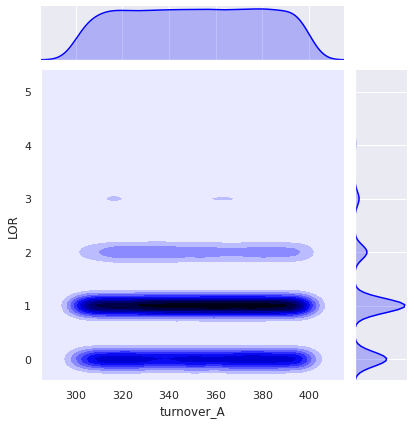

In [140]:
sns.jointplot(x='turnover_A', y='LOR',
              data=df, color='blue', kind='kde')

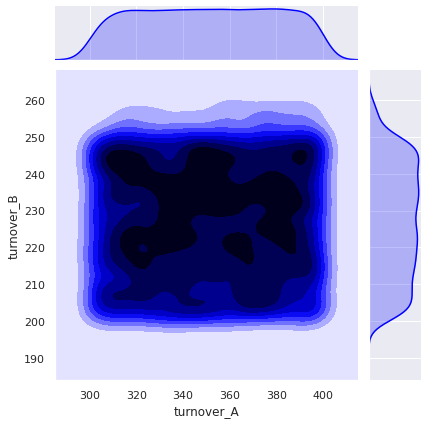

In [141]:
sns.jointplot(x='turnover_A', y='turnover_B',
              data=df, color='blue', kind='kde')

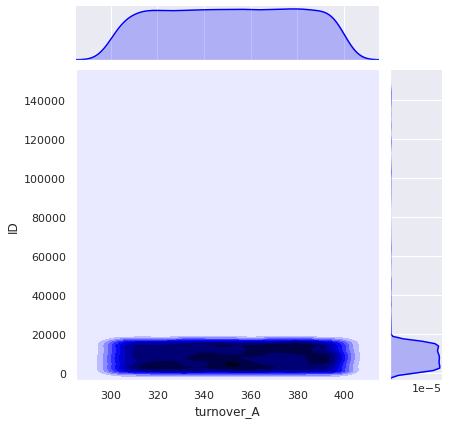

In [142]:
sns.jointplot(x='turnover_A', y='ID', data=df,
              color='blue', kind='kde')

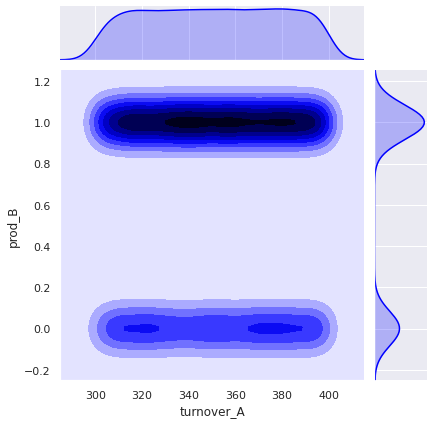

In [143]:
sns.jointplot(x='turnover_A', y='prod_B',
              data=df, color='blue', kind='kde')

## Relation prod_A - prod_B

* situation 0: (A=0,B=0) 
* sit 1: (A=1,B=0)
* sit 2: (A=0,B=1) 
* sit 3: (A=1,B=1) 

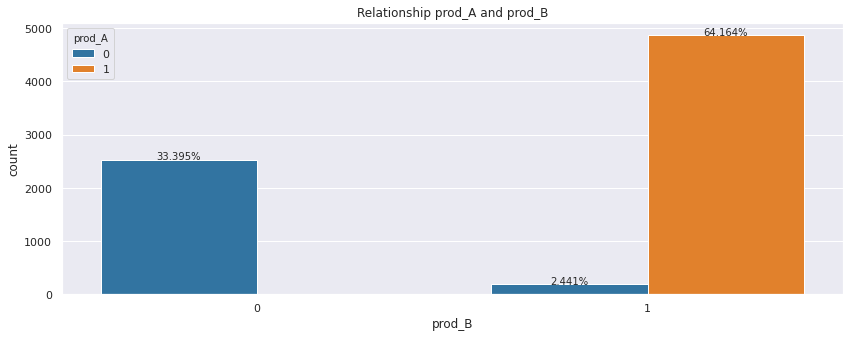

In [144]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x="prod_B", data=df, hue=df['prod_A'])
plt.title('Relationship prod_A and prod_B')

total = len(df['prod_B'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

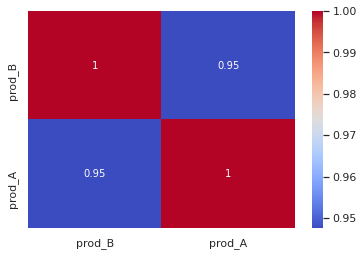

In [145]:
sns.heatmap(df[['prod_B', 'prod_A']
                             ].corr(), annot=True, cmap='coolwarm')

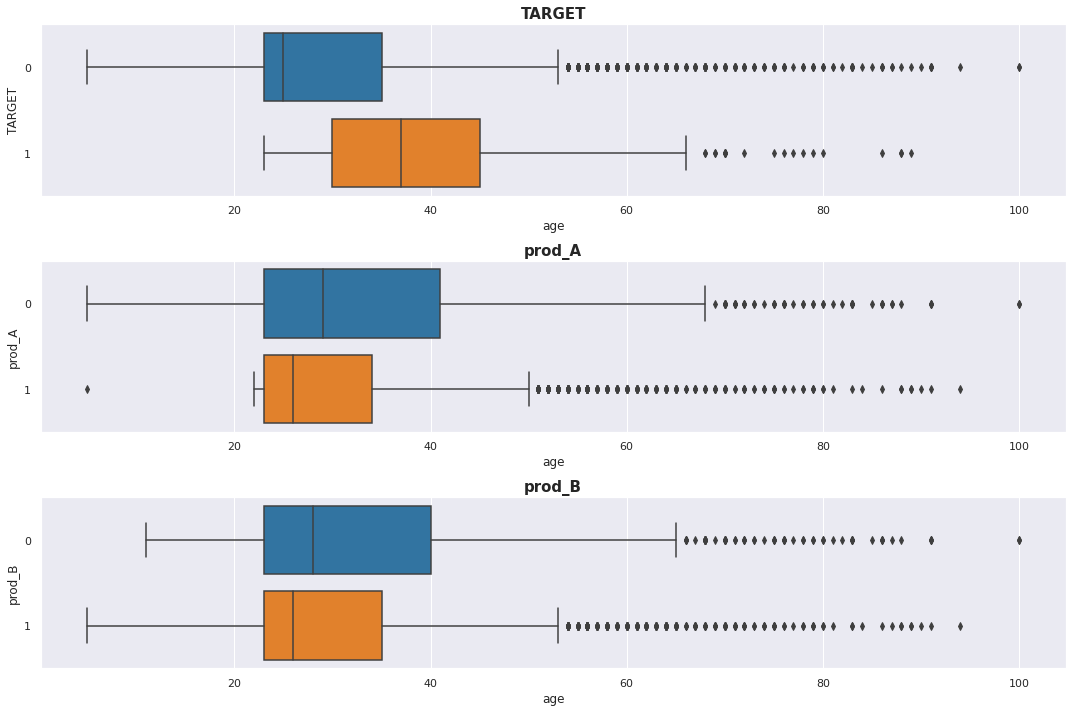

In [146]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 10))

sns.boxplot(x="age", y="TARGET", ax=axs[0],data=df, orient="h").set_title('TARGET', fontweight="bold", size=15)
sns.boxplot(x="age", y="prod_A", ax=axs[1],data=df, orient="h").set_title('prod_A', fontweight="bold", size=15)
sns.boxplot(x="age", y="prod_B", ax=axs[2],data=df, orient="h").set_title('prod_B', fontweight="bold", size=15)
plt.tight_layout()

In [147]:
print("Median age of people not buying the target product is " +  
    str(df[df['TARGET'] == 0]['age'].median()))
print("Median age of people buying the target product is " +
      str(df[df['TARGET'] == 1]['age'].median()))
print('-'*30)
print("Median age of people not buying prod_A is " +
      str(df[df['prod_A'] == 0]['age'].median()))
print("Median age of people buying prod_A is " +
      str(df[df['prod_A'] == 1]['age'].median()))
print('-'*30)
print("Median age of people not buying prod_B is " +
      str(df[df['prod_B'] == 0]['age'].median()))
print("Median age of people buying prod_B is " +
      str(df[df['prod_B'] == 1]['age'].median()))

Median age of people not buying the target product is 25.0
Median age of people buying the target product is 37.0
------------------------------
Median age of people not buying prod_A is 29.0
Median age of people buying prod_A is 26.0
------------------------------
Median age of people not buying prod_B is 28.0
Median age of people buying prod_B is 26.0


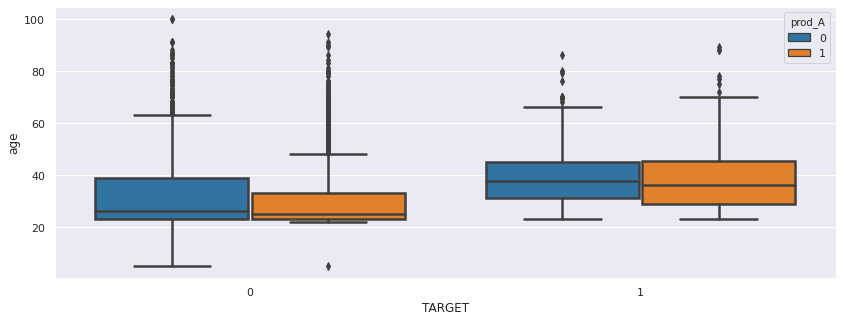

In [148]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="TARGET", y="age", hue="prod_A",
            data=df, linewidth=2.5, orient='H')

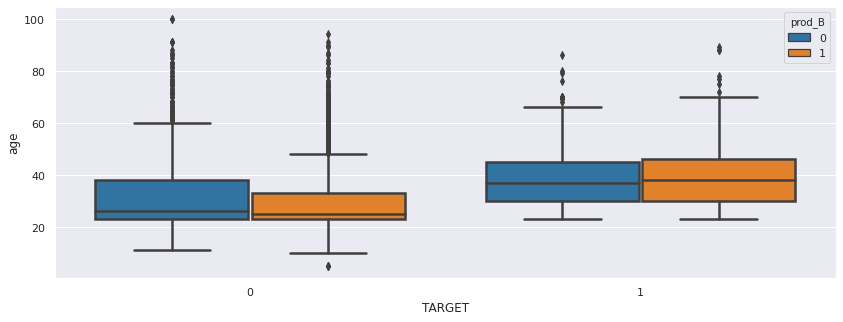

In [149]:
plt.figure(figsize=(14, 5))
sns.boxplot(x="TARGET", y="age", hue="prod_B",
            data=df, linewidth=2.5, orient='H')

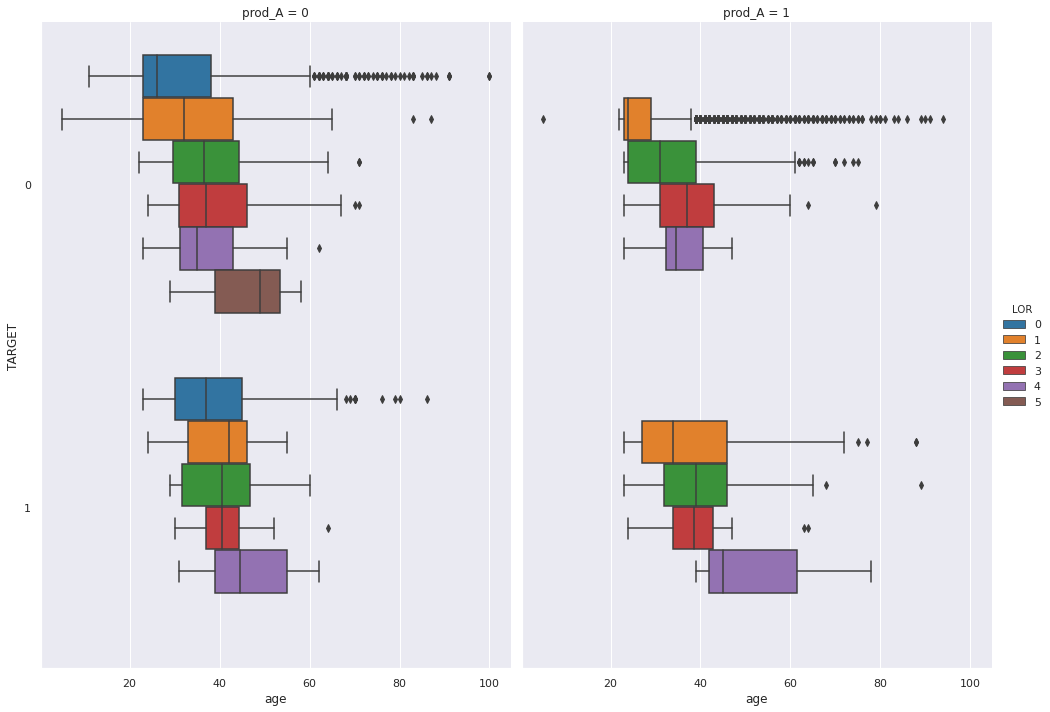

In [150]:
g = sns.catplot(x="age", y="TARGET",
                hue="LOR", col="prod_A",
                data=df, kind="box",
                height=10, aspect=.7, orient='h')

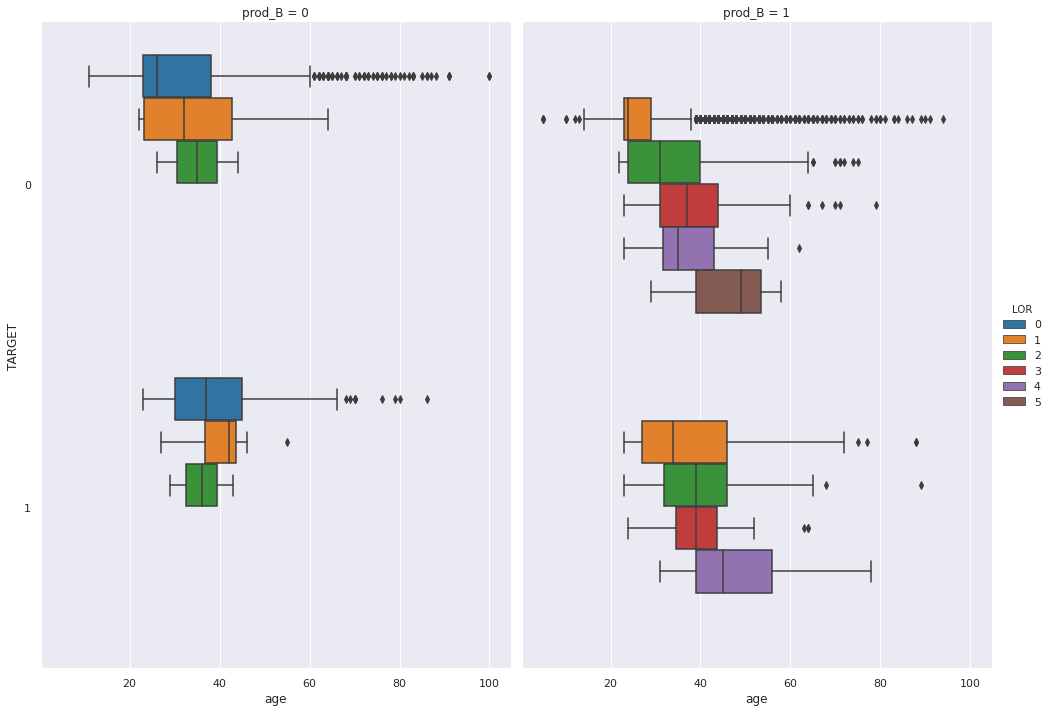

In [151]:
g = sns.catplot(x="age", y="TARGET",
                hue="LOR", col="prod_B",
                data=df, kind="box",
                height=10, aspect=.7, orient='h')

## Correlation matrix before modeling

### X and y

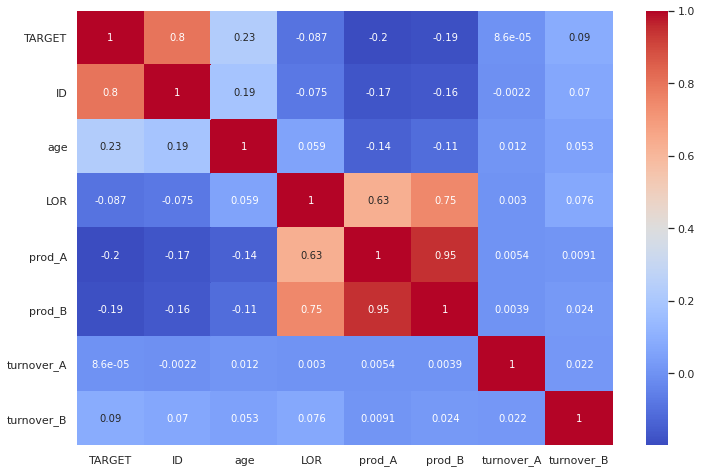

In [152]:
cm_combo = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm_combo, annot=True, cmap='coolwarm')

### X

Check for Multicollinearity (independent variables are correlated)

Multicollinearity is a statistical phenomenon in which two of more explanatory variables in a regression model are strongly correlated, which means that one of them can be predicted based on the model. Multicollinearity affects the calculation of the coefficients, as they at least overlap in that case, and thus reduces their reliability.

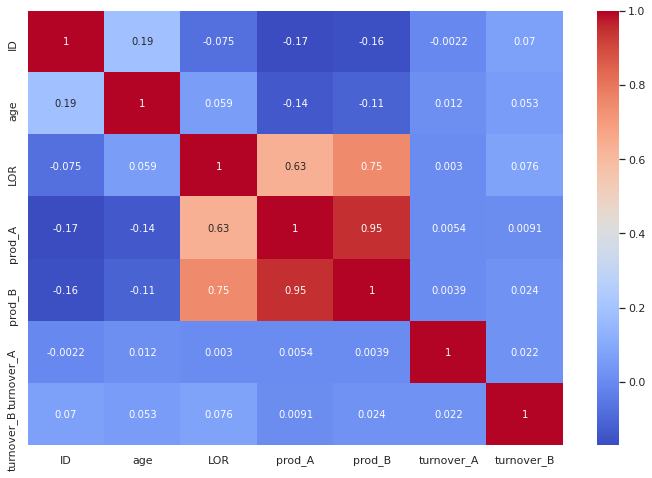

In [153]:
cm_X_combo = (df.drop('TARGET', axis=1)).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm_X_combo, annot=True, cmap='coolwarm')

#### VIF: Variance inflation factor 

* helps a formal detection-tolerance for multicollinearity. VIF of 5 or 10 and above (depends on the business problem) indicates a multicollinearity problem.

In [154]:
# https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_combo = add_constant(df)

In [155]:
pd.Series([variance_inflation_factor(X_combo.values, i)
           for i in range(X_combo.shape[1])],
          index=X_combo.columns)

# VIF of 5 or 10 and above indicates a multicollinearity problem.
# If there is perfect correlation, then VIF = infinity.

const         379.621031
TARGET          2.878840
ID              2.796936
age             1.106642
LOR             2.720511
prod_A         11.240436
prod_B         15.327481
turnover_A      1.000695
turnover_B      1.017511
dtype: float64

* LOR, prod_A, prod_B give colinearity

## Excluding colinearities

Create different dataframes to exclude colinearities and have highest correlation with target.

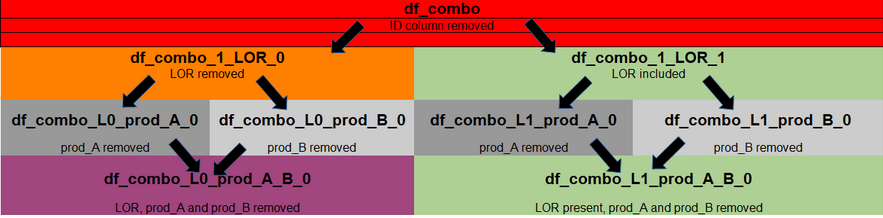

### df_combo

In [156]:
df_combo = df.drop('ID', axis=1)

### Create left side flowchart

In [157]:
df_combo_1_LOR_0 = df_combo.drop('LOR', axis=1)
df_combo_L0_prod_A_0 = df_combo_1_LOR_0.drop('prod_A', axis=1)
df_combo_L0_prod_B_0 = df_combo_1_LOR_0.drop('prod_B', axis=1)
df_combo_L0_prod_A_B_0 = df_combo_1_LOR_0.drop(['prod_A', 'prod_B'], axis=1)

### Create right side flowchart

In [158]:
df_combo_1_LOR_1 = df_combo
df_combo_L1_prod_A_0 = df_combo.drop('prod_A', axis=1)
df_combo_L1_prod_B_0 = df_combo.drop('prod_B', axis=1)
df_combo_L1_prod_A_B_0 = df_combo.drop(['prod_A', 'prod_B'], axis=1)

### Correlation matrix per dataframe

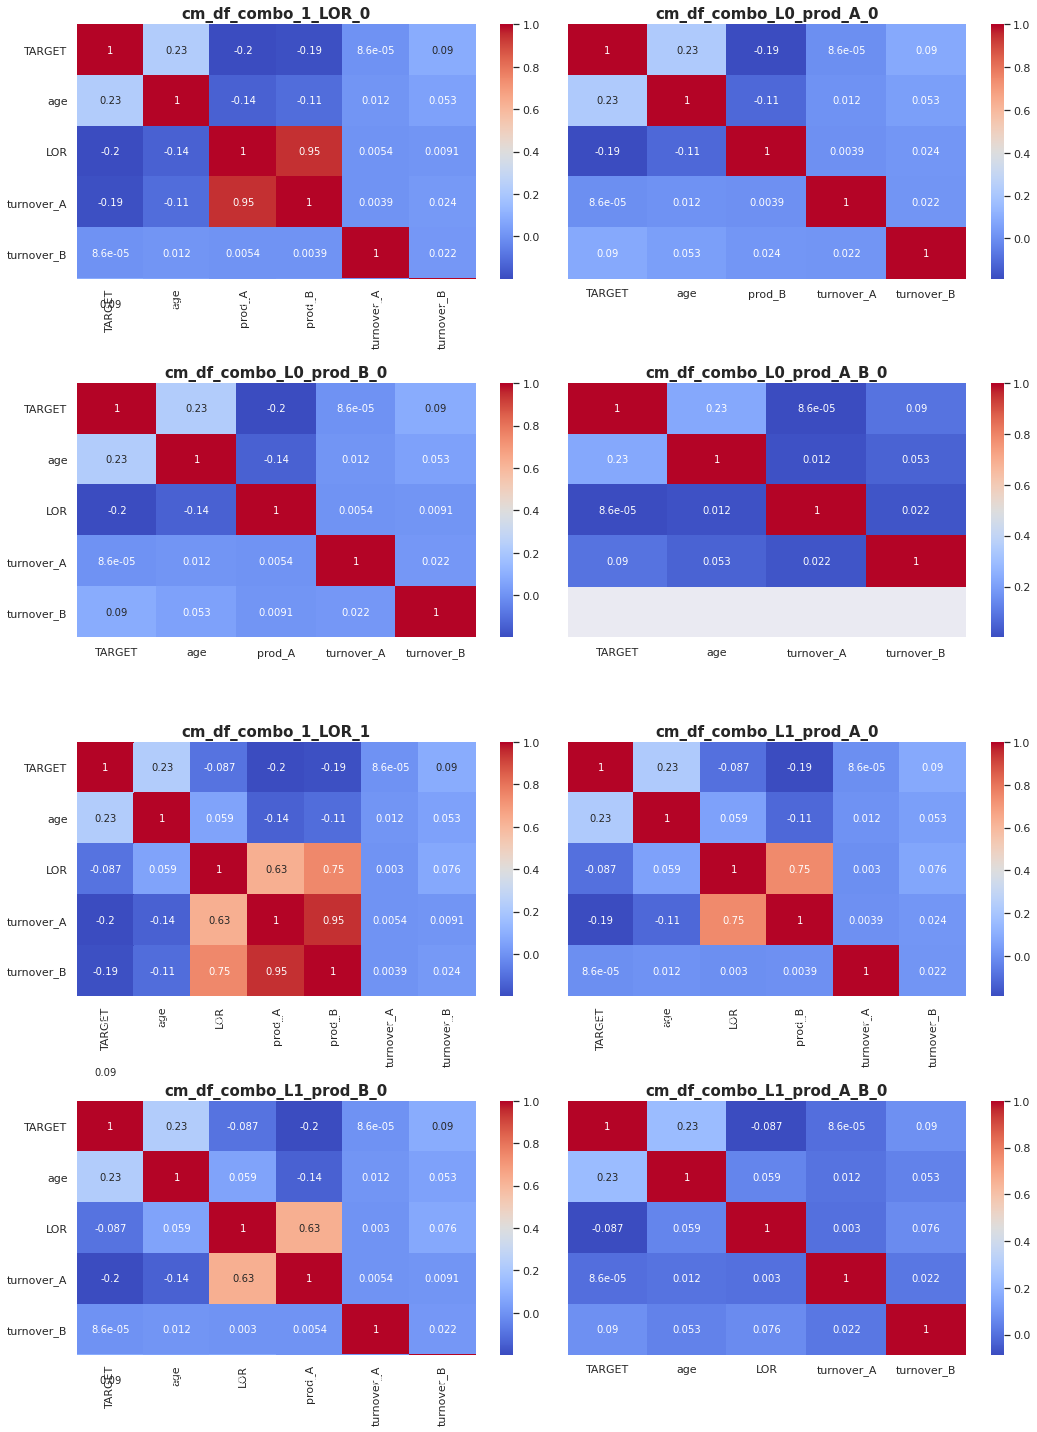

In [159]:
cm_df_combo_1_LOR_0 = df_combo_1_LOR_0.corr()
cm_df_combo_L0_prod_A_0 = df_combo_L0_prod_A_0.corr()
cm_df_combo_L0_prod_B_0 = df_combo_L0_prod_B_0.corr()
cm_df_combo_L0_prod_A_B_0 = df_combo_L0_prod_A_B_0.corr()

cm_df_combo_1_LOR_1 = df_combo_1_LOR_1.corr()
cm_df_combo_L1_prod_A_0 = df_combo_L1_prod_A_0.corr()
cm_df_combo_L1_prod_B_0 = df_combo_L1_prod_B_0.corr()
cm_df_combo_L1_prod_A_B_0 = df_combo_L1_prod_A_B_0.corr()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)
      ) = plt.subplots(4, 2, figsize=(15, 20), sharey=True)

sns.heatmap(cm_df_combo_1_LOR_0, annot=True, cmap='coolwarm', ax=ax1).set_title(
    'cm_df_combo_1_LOR_0', fontweight="bold", size=15)
sns.heatmap(cm_df_combo_L0_prod_A_0, annot=True, cmap='coolwarm', ax=ax2).set_title(
    'cm_df_combo_L0_prod_A_0', fontweight="bold", size=15)
sns.heatmap(cm_df_combo_L0_prod_B_0, annot=True, cmap='coolwarm', ax=ax3).set_title(
    'cm_df_combo_L0_prod_B_0', fontweight="bold", size=15)
sns.heatmap(cm_df_combo_L0_prod_A_B_0, cmap='coolwarm', annot=True, ax=ax4).set_title(
    'cm_df_combo_L0_prod_A_B_0', fontweight="bold", size=15)
sns.heatmap(cm_df_combo_1_LOR_1, annot=True, cmap='coolwarm', ax=ax5).set_title(
    'cm_df_combo_1_LOR_1', fontweight="bold", size=15)
sns.heatmap(cm_df_combo_L1_prod_A_0, annot=True, cmap='coolwarm', ax=ax6).set_title(
    'cm_df_combo_L1_prod_A_0', fontweight="bold", size=15)
sns.heatmap(cm_df_combo_L1_prod_B_0, annot=True, cmap='coolwarm', ax=ax7).set_title(
    'cm_df_combo_L1_prod_B_0', fontweight="bold", size=15)
sns.heatmap(cm_df_combo_L1_prod_A_B_0, annot=True, cmap='coolwarm', ax=ax8).set_title(
    'cm_df_combo_L1_prod_A_B_0', fontweight="bold", size=15)

fig.tight_layout()

### The chosen one

No collinearity and highest correlation with target for:

* df_combo_L0_prod_B_0

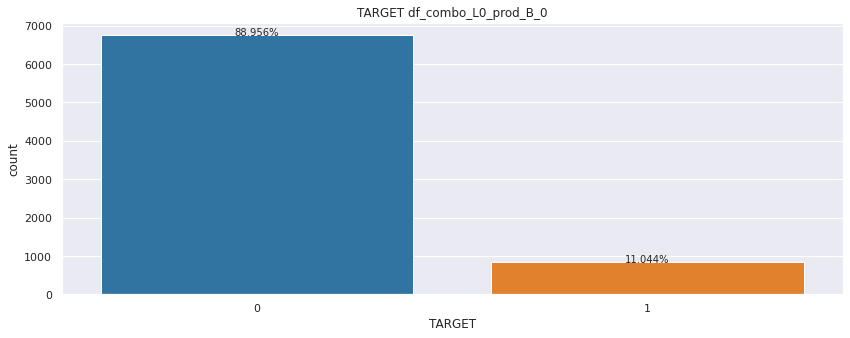

In [160]:
fig = plt.figure(figsize=(14, 5))
ax = sns.countplot(x="TARGET", data=df_combo_L0_prod_B_0)
plt.title('TARGET df_combo_L0_prod_B_0')
total = len(df_combo_L0_prod_B_0['TARGET'])
for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

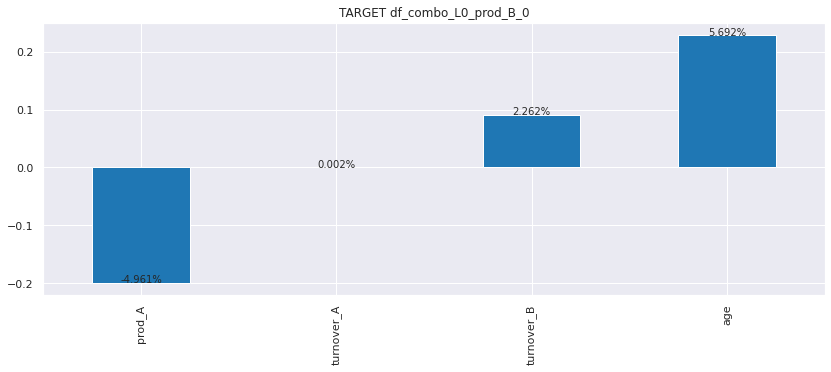

In [161]:
fig = plt.figure(figsize=(14, 5))
ax = df_combo_L0_prod_B_0.corr()['TARGET'][1:].sort_values().plot(kind='bar')
plt.title('TARGET df_combo_L0_prod_B_0')
total = len(df_combo_L0_prod_B_0.corr()['TARGET'][1:].sort_values())
for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 0,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

### Rename

* df_combo_L0_prod_B_0 = df_alpha_B

In [162]:
df_alpha_B = df_combo_L0_prod_B_0

# Modeling and predictions

Techniques:

* Logistic regression
* SVM
* Random forest

To do:

* KNN
* K-fold CV
* PCA


## Performance metrics

1. Confussion matrix: to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

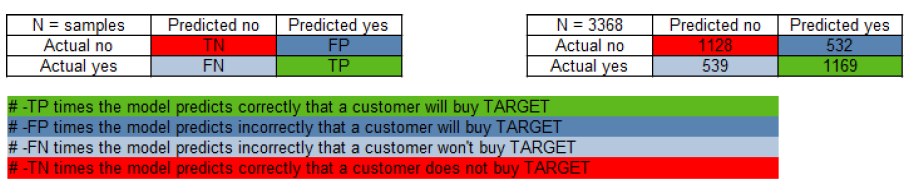

2. Measure of success of prediction

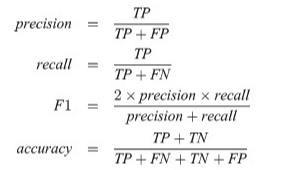

Example: The output is either people buying or not buying the new product.


Accuracy

* It’s the ratio of the correctly labeled samples to all the samples.
* Accuracy is the most intuitive one.
* Accuracy answers the following question: How many samples did we correctly label out of all the samples?
* Accuracy = (TP+TN)/(TP+FP+FN+TN)
* numerator: all correctly labeled (All trues)
* denominator: all the samples

Precision

* Precision is the ratio of the correctly labeled to all positive labeled.
* Precision answers the following: How many of those the model labeled positive are actually buying?
* Precision = TP/(TP+FP)
* numerator: All the correctly labeled people buying the new product.
* denominator: all the positively labeled people buying the new product.

Recall (aka Sensitivity)

* Recall is the ratio of the correctly labeled samples by all the people actually buying the new product.
* Recall answers the following question: Of all the people who buying the new product, how many of those are  predicted correctly?
* Recall = TP/(TP+FN)
* numerator: sampled predicted correctly
* denominator: all people buying the new product

F1-score (aka F-Score / F-Measure)

* F1 Score considers both precision and recall.
* It is the harmonic mean(average) of the precision and recall.
* F1 Score is best if there is some sort of balance between precision (p) & recall (r) in the system. Oppositely F1 Score isn’t so high if one measure is improved at the expense of the other.
* For example, if P is 1 & R is 0, F1 score is 0.
* F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [163]:
df_alpha_B['age']=np.log(df_alpha_B['age'])

## Logistic regression

### Training on imbalanced datasets

#### Train Test Split

In [164]:
X = df_alpha_B.drop('TARGET', axis=1).values
y = df_alpha_B['TARGET'].values

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)


#### Scaling Data

In [167]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
scaler = MinMaxScaler()

In [169]:
scaler.fit(X_train)

MinMaxScaler()

In [170]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creating and training a logistic regression model
             

In [171]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

#### Predictions and Evaluations

In [172]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Model performance on train dataset

In [173]:
training_predictions = logmodel.predict(X_train)

In [174]:
print(classification_report(y_train, training_predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4536
           1       0.22      0.01      0.01       541

    accuracy                           0.89      5077
   macro avg       0.56      0.50      0.48      5077
weighted avg       0.82      0.89      0.84      5077



In [175]:
print(confusion_matrix(y_train, training_predictions))

[[4522   14]
 [ 537    4]]


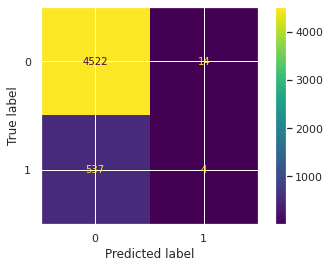

In [176]:
plot_confusion_matrix(logmodel, X_train, y_train)

#### Model performance on test dataset

In [177]:
test_predictions = logmodel.predict(X_test)

In [178]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2206
           1       0.00      0.00      0.00       296

    accuracy                           0.88      2502
   macro avg       0.44      0.50      0.47      2502
weighted avg       0.78      0.88      0.83      2502



In [179]:
# Remember:
# 72.674% didn't buy the new product
# 27.326% bought ..

In [180]:
print(confusion_matrix(y_test, test_predictions))

[[2201    5]
 [ 296    0]]


In [181]:
# TN FN
# FP TP

# -TP times the model predicts correctly that a customer will buy TARGET
# -FP times the model predicts icorrectly that a customer will buy TARGET
# -FN times the model predicts incorrectly that a customer won't buy TARGET, while he did buy it
# -TN times the model predicts correctly that a customer does not buy TARGET

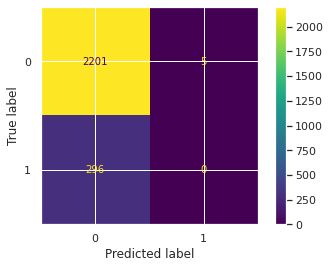

In [182]:
plot_confusion_matrix(logmodel, X_test, y_test)

### Training on oversampled datasets

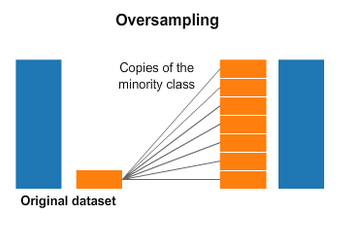

* Prone to overfitting. The effect can be better performance on the training dataset, but worse performance on the holdout or test dataset.

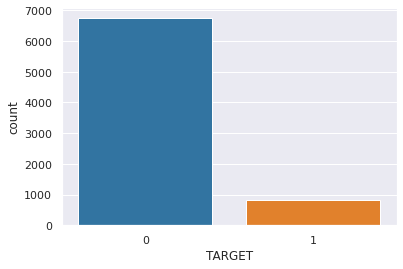

In [183]:
sns.countplot(df_alpha_B['TARGET'])

In [184]:
df_alpha_B.shape

(7579, 5)

In [185]:
X = df_alpha_B.drop('TARGET', axis=1).values
y = df_alpha_B['TARGET'].values

In [186]:
from imblearn.over_sampling import RandomOverSampler

In [187]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [188]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [189]:
from collections import Counter

In [190]:
# summarize class distribution
print(Counter(y))

Counter({0: 6742, 1: 837})


In [191]:
# summarize class distribution
print(Counter(y_over))

Counter({1: 6742, 0: 6742})


Text(0.5, 1.0, 'After')

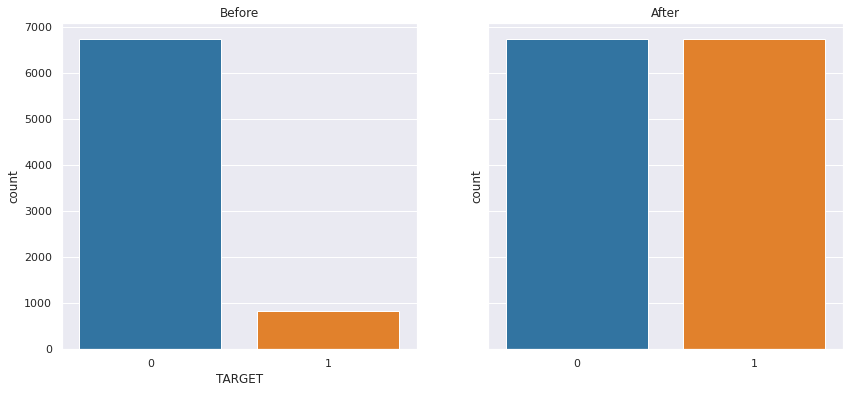

In [192]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(df_alpha_B['TARGET'], ax=ax1).set_title('Before')
sns.countplot((y_over), ax=ax2).set_title('After')

#### Train Test Split

In [193]:
X = X_over
y = y_over

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)

#### Scaling Data

In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
scaler = MinMaxScaler()

In [198]:
scaler.fit(X_train)

MinMaxScaler()

In [199]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creating and training a logistic regression model
             

In [200]:
from sklearn.linear_model import LogisticRegression

logmodel_over = LogisticRegression()
logmodel_over.fit(X_train, y_train)

LogisticRegression()

#### Predictions and Evaluations

In [201]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Model performance on train dataset

In [202]:
training_predictions = logmodel_over.predict(X_train)

In [203]:
print(classification_report(y_train, training_predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4551
           1       0.72      0.70      0.71      4483

    accuracy                           0.72      9034
   macro avg       0.72      0.72      0.72      9034
weighted avg       0.72      0.72      0.72      9034



In [204]:
print(confusion_matrix(y_train, training_predictions))

[[3343 1208]
 [1343 3140]]


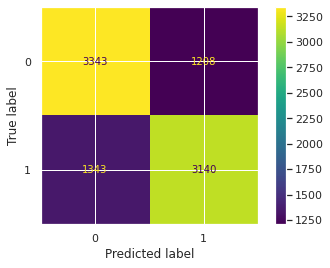

In [205]:
plot_confusion_matrix(logmodel_over, X_train, y_train)

#### Model performance on test dataset

In [206]:
test_predictions = logmodel_over.predict(X_test)

In [207]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      2191
           1       0.73      0.70      0.71      2259

    accuracy                           0.71      4450
   macro avg       0.71      0.71      0.71      4450
weighted avg       0.71      0.71      0.71      4450



In [208]:
print(confusion_matrix(y_test, test_predictions))

[[1597  594]
 [ 681 1578]]


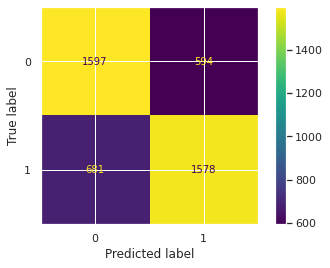

In [209]:
plot_confusion_matrix(logmodel_over, X_test, y_test)

### Training on undersampled datasets

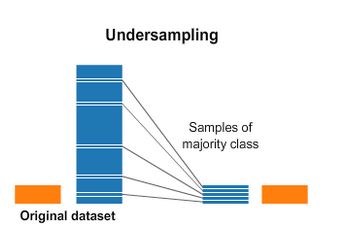


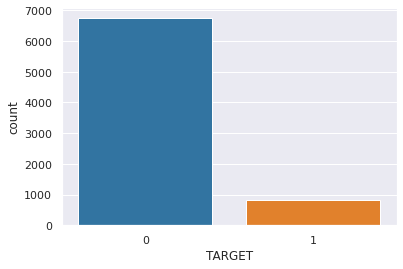

In [210]:
sns.countplot(df_alpha_B['TARGET'])

In [211]:
df_alpha_B.shape

(7579, 5)

In [212]:
X = df_alpha_B.drop('TARGET', axis=1).values
y = df_alpha_B['TARGET'].values

In [213]:
from imblearn.under_sampling import RandomUnderSampler

In [214]:
# define undersampling strategy
oversample = RandomUnderSampler(sampling_strategy='majority')

In [215]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [216]:
from collections import Counter

In [217]:
# summarize class distribution
print(Counter(y))

Counter({0: 6742, 1: 837})


In [218]:
# summarize class distribution
print(Counter(y_over))

Counter({0: 837, 1: 837})


Text(0.5, 1.0, 'After')

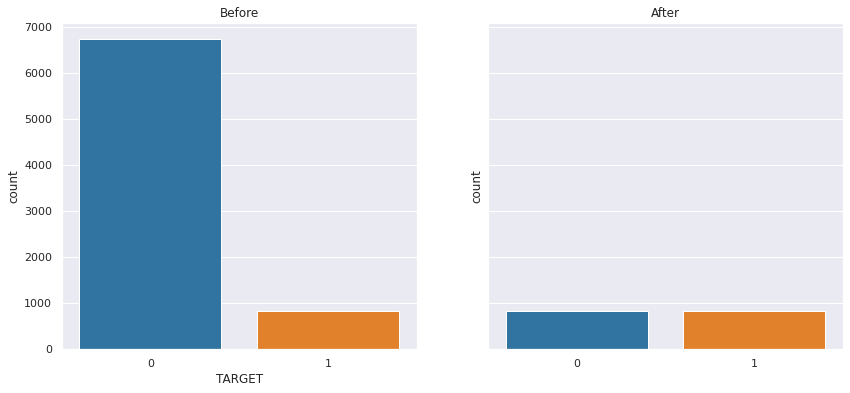

In [219]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(df_alpha_B['TARGET'], ax=ax1).set_title('Before')
sns.countplot((y_over), ax=ax2).set_title('After')

#### Train Test Split

In [220]:
X = X_over
y = y_over

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)


#### Scaling Data

In [223]:
from sklearn.preprocessing import MinMaxScaler

In [224]:
scaler = MinMaxScaler()

In [225]:
scaler.fit(X_train)

MinMaxScaler()

In [226]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creating and training a logistic regression model
             

In [227]:
from sklearn.linear_model import LogisticRegression

logmodel_under = LogisticRegression()
logmodel_under.fit(X_train, y_train)

LogisticRegression()

#### Predictions and Evaluations

In [228]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Model performance on train dataset

In [229]:
training_predictions = logmodel_under.predict(X_train)

In [230]:
print(classification_report(y_train, training_predictions))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       556
           1       0.71      0.71      0.71       565

    accuracy                           0.70      1121
   macro avg       0.70      0.70      0.70      1121
weighted avg       0.70      0.70      0.70      1121



In [231]:
print(confusion_matrix(y_train, training_predictions))

[[389 167]
 [164 401]]


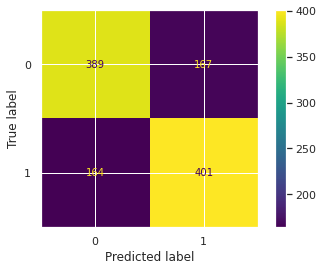

In [232]:
plot_confusion_matrix(logmodel_under, X_train, y_train)

#### Model performance on test dataset

In [233]:
test_predictions = logmodel_under.predict(X_test)

In [234]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       281
           1       0.69      0.67      0.68       272

    accuracy                           0.69       553
   macro avg       0.69      0.69      0.69       553
weighted avg       0.69      0.69      0.69       553



In [235]:
print(confusion_matrix(y_test, test_predictions))

[[199  82]
 [ 89 183]]


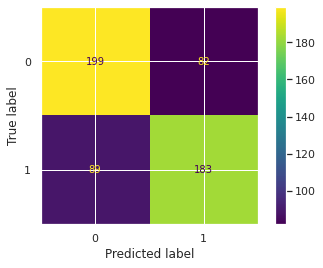

In [236]:
plot_confusion_matrix(logmodel_under, X_test, y_test)

## SVM: Support vector machine

### Training on imbalanced datasets

#### Train Test Split

In [237]:
X = df_alpha_B.drop('TARGET', axis=1).values
y = df_alpha_B['TARGET'].values

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)


#### Scaling Data

In [240]:
from sklearn.preprocessing import MinMaxScaler

In [241]:
scaler = MinMaxScaler()

In [242]:
scaler.fit(X_train)

MinMaxScaler()

In [243]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creating and training a SVM model
             

In [244]:
from sklearn.svm import SVC

In [245]:
svc_model = SVC()

In [246]:
svc_model.fit(X_train, y_train)

SVC()

#### Predictions and Evaluations

In [247]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Model performance on train dataset

In [248]:
training_predictions = svc_model.predict(X_train)

In [249]:
print(classification_report(y_train, training_predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4536
           1       0.83      0.01      0.02       541

    accuracy                           0.89      5077
   macro avg       0.86      0.50      0.48      5077
weighted avg       0.89      0.89      0.85      5077



In [250]:
print(confusion_matrix(y_train, training_predictions))

[[4535    1]
 [ 536    5]]


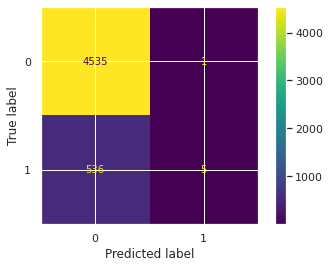

In [251]:
plot_confusion_matrix(svc_model, X_train, y_train)

#### Model performance on test dataset

In [252]:
test_predictions = svc_model.predict(X_test)

In [253]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2206
           1       1.00      0.01      0.01       296

    accuracy                           0.88      2502
   macro avg       0.94      0.50      0.48      2502
weighted avg       0.90      0.88      0.83      2502



In [254]:
print(confusion_matrix(y_test, test_predictions))

[[2206    0]
 [ 294    2]]


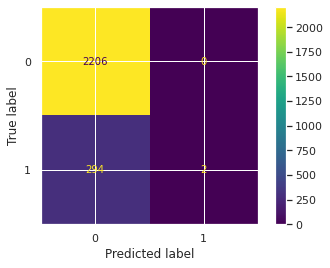

In [255]:
plot_confusion_matrix(svc_model, X_test, y_test)

### Training on oversampled datasets



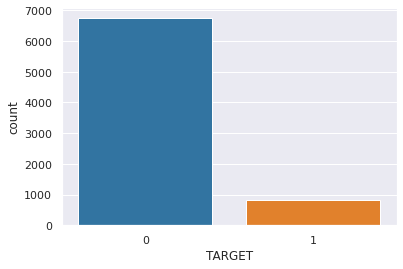

In [256]:
sns.countplot(df_alpha_B['TARGET'])

In [257]:
df_alpha_B.shape

(7579, 5)

In [258]:
X = df_alpha_B.drop('TARGET', axis=1).values
y = df_alpha_B['TARGET'].values

In [259]:
from imblearn.over_sampling import RandomOverSampler

In [260]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [261]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [262]:
from collections import Counter

In [263]:
# summarize class distribution
print(Counter(y))

Counter({0: 6742, 1: 837})


In [264]:
# summarize class distribution
print(Counter(y_over))

Counter({1: 6742, 0: 6742})


Text(0.5, 1.0, 'After')

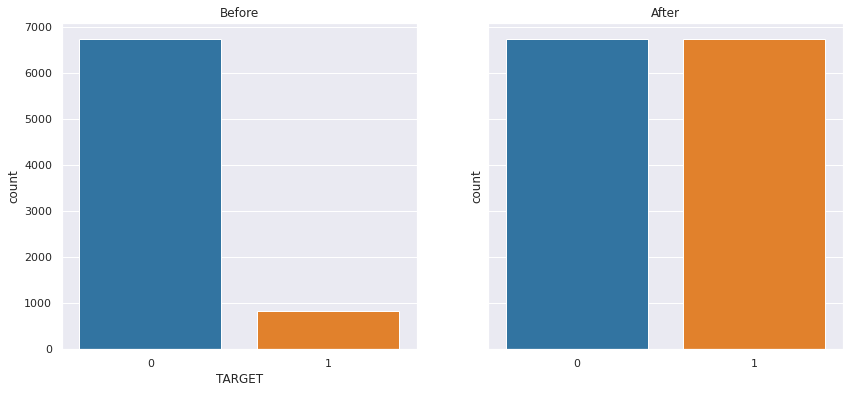

In [265]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(df_alpha_B['TARGET'], ax=ax1).set_title('Before')
sns.countplot((y_over), ax=ax2).set_title('After')

#### Train Test Split

In [266]:
X = X_over
y = y_over

In [267]:
from sklearn.model_selection import train_test_split

In [268]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)


#### Scaling Data

In [269]:
from sklearn.preprocessing import MinMaxScaler

In [270]:
scaler = MinMaxScaler()

In [271]:
scaler.fit(X_train)

MinMaxScaler()

In [272]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creating and training a SVM model
             

In [273]:
from sklearn.svm import SVC

In [274]:
SVM_over = SVC()

In [275]:
SVM_over.fit(X_train, y_train)

SVC()

#### Predictions and Evaluations

In [276]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Model performance on train dataset

In [277]:
training_predictions = SVM_over.predict(X_train)

In [278]:
print(classification_report(y_train, training_predictions))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      4551
           1       0.73      0.75      0.74      4483

    accuracy                           0.74      9034
   macro avg       0.74      0.74      0.74      9034
weighted avg       0.74      0.74      0.74      9034



In [279]:
print(confusion_matrix(y_train, training_predictions))

[[3304 1247]
 [1113 3370]]


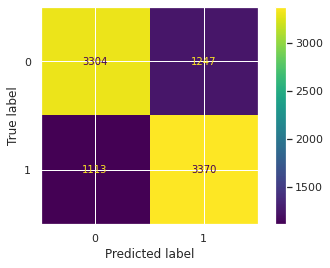

In [280]:
plot_confusion_matrix(SVM_over, X_train, y_train)

#### Model performance on test dataset

In [281]:
test_predictions = SVM_over.predict(X_test)

In [282]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2191
           1       0.73      0.75      0.74      2259

    accuracy                           0.73      4450
   macro avg       0.73      0.73      0.73      4450
weighted avg       0.73      0.73      0.73      4450



In [283]:
print(confusion_matrix(y_test, test_predictions))

[[1579  612]
 [ 568 1691]]


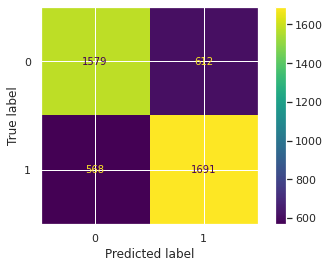

In [284]:
plot_confusion_matrix(SVM_over, X_test, y_test)

### Training on undersampled datasets

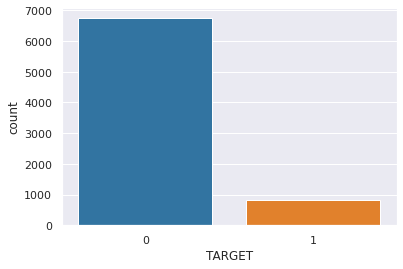

In [285]:
sns.countplot(df_alpha_B['TARGET'])

In [286]:
df_alpha_B.shape

(7579, 5)

In [287]:
X = df_alpha_B.drop('TARGET', axis=1).values
y = df_alpha_B['TARGET'].values

In [288]:
from imblearn.under_sampling import RandomUnderSampler

In [289]:
# define undersampling strategy
oversample = RandomUnderSampler(sampling_strategy='majority')

In [290]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [291]:
from collections import Counter

In [292]:
# summarize class distribution
print(Counter(y))

Counter({0: 6742, 1: 837})


In [293]:
# summarize class distribution
print(Counter(y_over))

Counter({0: 837, 1: 837})


Text(0.5, 1.0, 'After')

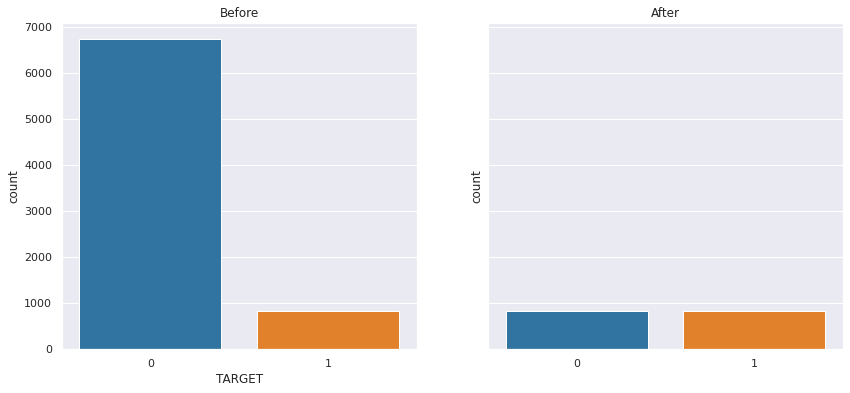

In [294]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(df_alpha_B['TARGET'], ax=ax1).set_title('Before')
sns.countplot((y_over), ax=ax2).set_title('After')

#### Train Test Split

In [295]:
X = X_over
y = y_over

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)


#### Scaling Data

In [298]:
from sklearn.preprocessing import MinMaxScaler

In [299]:
scaler = MinMaxScaler()

In [300]:
scaler.fit(X_train)

MinMaxScaler()

In [301]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creating and training a SVM model
             

In [302]:
from sklearn.svm import SVC

In [303]:
SVM_under = SVC()

In [304]:
SVM_under.fit(X_train, y_train)

SVC()

#### Predictions and Evaluations

In [305]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Model performance on train dataset

In [306]:
training_predictions = SVM_under.predict(X_train)

In [307]:
print(classification_report(y_train, training_predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       556
           1       0.73      0.78      0.75       565

    accuracy                           0.74      1121
   macro avg       0.74      0.74      0.74      1121
weighted avg       0.74      0.74      0.74      1121



In [308]:
print(confusion_matrix(y_train, training_predictions))

[[391 165]
 [124 441]]


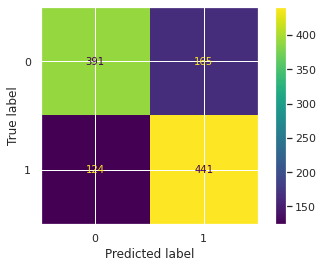

In [309]:
plot_confusion_matrix(SVM_under, X_train, y_train)

#### Model performance on test dataset

In [310]:
test_predictions = SVM_under.predict(X_test)

In [311]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       281
           1       0.74      0.78      0.76       272

    accuracy                           0.76       553
   macro avg       0.76      0.76      0.76       553
weighted avg       0.76      0.76      0.76       553



In [312]:
print(confusion_matrix(y_test, test_predictions))

[[207  74]
 [ 59 213]]


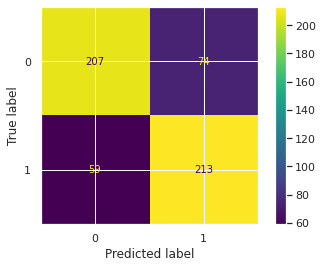

In [313]:
plot_confusion_matrix(SVM_under, X_test, y_test)

## Random forest

Only train on over and undersampled datasets

### Training on oversampled datasets



In [314]:
# pip install -U imbalanced-learn
# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
# check version number
import imblearn
print(imblearn.__version__)


0.7.0


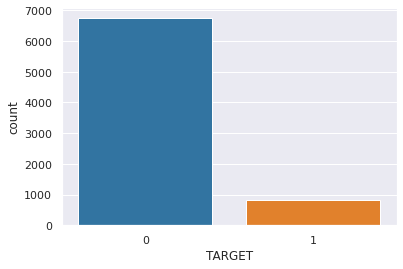

In [315]:
sns.countplot(df_alpha_B['TARGET'])

In [316]:
df_alpha_B.shape

(7579, 5)

In [317]:
X = df_alpha_B.drop('TARGET', axis=1).values
y = df_alpha_B['TARGET'].values

In [318]:
from imblearn.over_sampling import RandomOverSampler

In [319]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [320]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [321]:
from collections import Counter

In [322]:
# summarize class distribution
print(Counter(y))

Counter({0: 6742, 1: 837})


In [323]:
# summarize class distribution
print(Counter(y_over))

Counter({1: 6742, 0: 6742})


Text(0.5, 1.0, 'After')

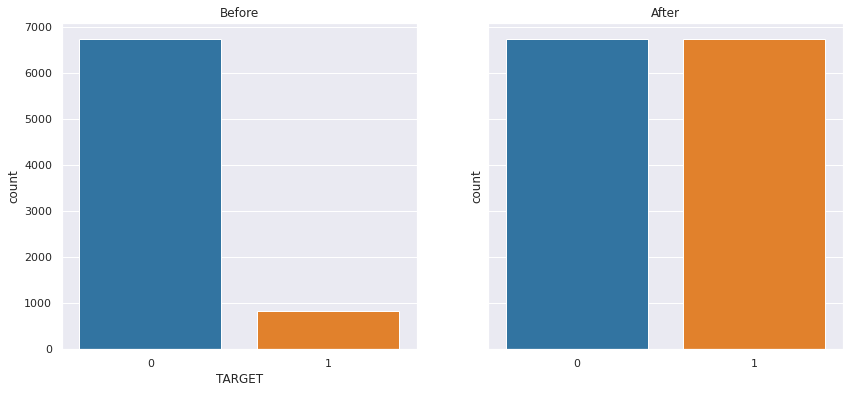

In [324]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(df_alpha_B['TARGET'], ax=ax1).set_title('Before')
sns.countplot((y_over), ax=ax2).set_title('After')

#### Train Test Split

In [325]:
X = X_over
y = y_over

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)


#### Scaling Data

In [328]:
from sklearn.preprocessing import MinMaxScaler

In [329]:
scaler = MinMaxScaler()

In [330]:
scaler.fit(X_train)

MinMaxScaler()

In [331]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creating and training a RF model
             

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [333]:
RFC_over = RandomForestClassifier(n_estimators=600)

In [334]:
RFC_over.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

#### Predictions and Evaluations

In [335]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Model performance on train dataset

In [336]:
training_predictions = RFC_over.predict(X_train)

In [337]:
print(classification_report(y_train, training_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4551
           1       1.00      1.00      1.00      4483

    accuracy                           1.00      9034
   macro avg       1.00      1.00      1.00      9034
weighted avg       1.00      1.00      1.00      9034



In [338]:
print(confusion_matrix(y_train, training_predictions))

[[4551    0]
 [   0 4483]]


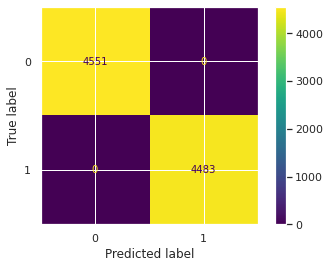

In [339]:
plot_confusion_matrix(RFC_over, X_train, y_train)

#### Model performance on test dataset

In [340]:
test_predictions = RFC_over.predict(X_test)

In [341]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2191
           1       0.91      1.00      0.95      2259

    accuracy                           0.95      4450
   macro avg       0.96      0.95      0.95      4450
weighted avg       0.96      0.95      0.95      4450



In [342]:
print(confusion_matrix(y_test, test_predictions))

[[1975  216]
 [   0 2259]]


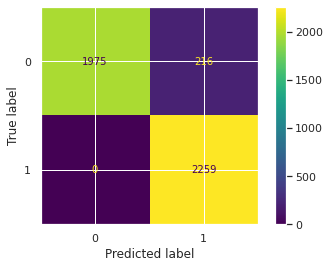

In [343]:
plot_confusion_matrix(RFC_over, X_test, y_test)

### Training on undersampled datasets

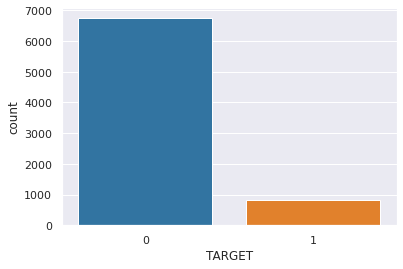

In [344]:
sns.countplot(df_alpha_B['TARGET'])

In [345]:
df_alpha_B.shape

(7579, 5)

In [346]:
X = df_alpha_B.drop('TARGET', axis=1).values
y = df_alpha_B['TARGET'].values

In [347]:
from imblearn.under_sampling import RandomUnderSampler

In [348]:
# define undersampling strategy
oversample = RandomUnderSampler(sampling_strategy='majority')

In [349]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [350]:
from collections import Counter

In [351]:
# summarize class distribution
print(Counter(y))

Counter({0: 6742, 1: 837})


In [352]:
# summarize class distribution
print(Counter(y_over))

Counter({0: 837, 1: 837})


Text(0.5, 1.0, 'After')

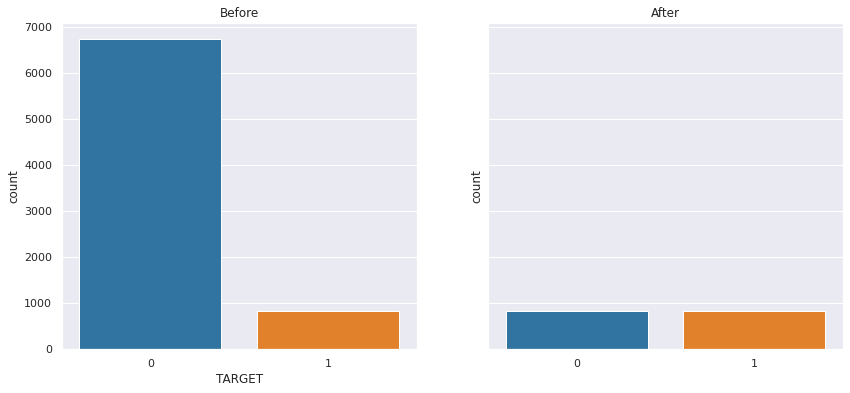

In [353]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(df_alpha_B['TARGET'], ax=ax1).set_title('Before')
sns.countplot((y_over), ax=ax2).set_title('After')

#### Train Test Split

In [354]:
X = X_over
y = y_over

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)


#### Scaling Data

In [357]:
from sklearn.preprocessing import MinMaxScaler

In [358]:
scaler = MinMaxScaler()

In [359]:
scaler.fit(X_train)

MinMaxScaler()

In [360]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Creating and training a RF model
             

In [361]:
from sklearn.ensemble import RandomForestClassifier

In [362]:
RFC_under = RandomForestClassifier(n_estimators=600)

In [363]:
RFC_under.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

#### Predictions and Evaluations

In [364]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Model performance on train dataset

In [365]:
training_predictions = RFC_under.predict(X_train)

In [366]:
print(classification_report(y_train, training_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       565

    accuracy                           1.00      1121
   macro avg       1.00      1.00      1.00      1121
weighted avg       1.00      1.00      1.00      1121



In [367]:
print(confusion_matrix(y_train, training_predictions))

[[556   0]
 [  0 565]]


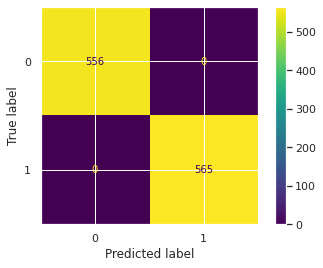

In [368]:
plot_confusion_matrix(RFC_under, X_train, y_train)

#### Model performance on test dataset

In [369]:
test_predictions = RFC_under.predict(X_test)

In [370]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       281
           1       0.69      0.75      0.72       272

    accuracy                           0.71       553
   macro avg       0.71      0.71      0.71       553
weighted avg       0.71      0.71      0.71       553



In [371]:
print(confusion_matrix(y_test, test_predictions))

[[190  91]
 [ 68 204]]


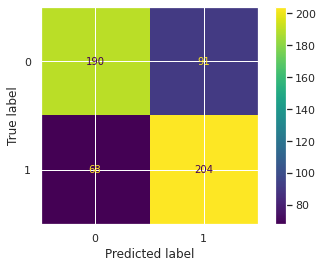

In [372]:
plot_confusion_matrix(RFC_under, X_test, y_test)

# Predictions on original dataset

In [373]:
from sklearn.metrics import f1_score, recall_score

### Load original dataset

In [374]:
original_dataset = pd.read_csv('/kaggle/input/insurance-company/Customer_data.csv')

### Remove predictors which the model does not know

In [375]:
original_dataset = original_dataset.drop(['loyalty', 'ID', 'city',
                                          'LOR', 'prod_A', 'type_A',
                                          'type_B', 'contract', 'age_P','lor_M'],axis=1)

In [376]:
original_dataset.columns

Index(['TARGET', 'age', 'prod_B', 'turnover_A', 'turnover_B'], dtype='object')

In [377]:
original_dataset['age']=np.log(original_dataset['age'])

### Seperate predictors and target

In [378]:
X_test = original_dataset.drop('TARGET', axis=1).values
y_test = original_dataset['TARGET'].values

### Scaling Data

In [379]:
from sklearn.preprocessing import MinMaxScaler

In [380]:
scaler = MinMaxScaler()

In [381]:
scaler.fit(X_test)

MinMaxScaler()

In [382]:
X_test = scaler.transform(X_test)

In [383]:
print(type(X_test))
print(len(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
14016
(14016, 4)


In [384]:
print(type(y_test))
print(len(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
14016
(14016,)


In [385]:
y_test

array(['Y', 'Y', 'Y', ..., 'Y', 'Y', 'Y'], dtype=object)

In [386]:
df_y_test = pd.DataFrame(data=y_test, columns=["true_values"])

In [387]:
def replace_yn(target):
    for t in target:
        if t == 'Y':
            return int(1)
        else:
            return int(0)


df_y_test['true_values'] = df_y_test['true_values'].apply(replace_yn)

In [388]:
df_y_test.values

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [389]:
y_test = df_y_test.values

## Logistic regression

### Predictions logmodel_over

In [390]:
test_predictions_logmodel_over = logmodel_over.predict(X_test)

In [391]:
print('1. The F-1 score of the model {}\n'.format(f1_score(y_test, test_predictions_logmodel_over, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(y_test, test_predictions_logmodel_over, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(y_test, test_predictions_logmodel_over)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(y_test, test_predictions_logmodel_over)))

1. The F-1 score of the model 0.6355524829184753

2. The recall score of the model 0.6390585106382979

3. Classification report 
               precision    recall  f1-score   support

           0       0.66      0.85      0.75      8000
           1       0.69      0.42      0.52      6016

    accuracy                           0.67     14016
   macro avg       0.67      0.64      0.64     14016
weighted avg       0.67      0.67      0.65     14016
 

4. Confusion matrix 
 [[6826 1174]
 [3460 2556]] 



#### Normalized confusion matrix

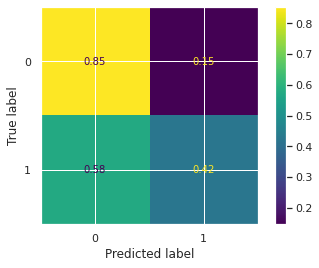

In [392]:
plot_confusion_matrix(logmodel_over, X_test, y_test,normalize='true')

#### Standard confusion matrix

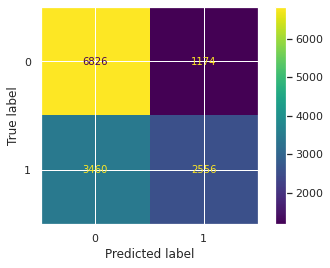

In [393]:
plot_confusion_matrix(logmodel_over, X_test, y_test)

### Predictions logmodel_under

In [394]:
test_predictions_logmodel_under = logmodel_under.predict(X_test)

In [395]:
print('1. The F-1 score of the model {}\n'.format(f1_score(y_test, test_predictions_logmodel_under, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(y_test, test_predictions_logmodel_under, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(y_test, test_predictions_logmodel_under)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(y_test, test_predictions_logmodel_under)))

1. The F-1 score of the model 0.5963024455934558

2. The recall score of the model 0.6138071808510638

3. Classification report 
               precision    recall  f1-score   support

           0       0.64      0.91      0.75      8000
           1       0.73      0.32      0.44      6016

    accuracy                           0.66     14016
   macro avg       0.68      0.61      0.60     14016
weighted avg       0.68      0.66      0.62     14016
 

4. Confusion matrix 
 [[7289  711]
 [4112 1904]] 



#### Normalized confusion matrix

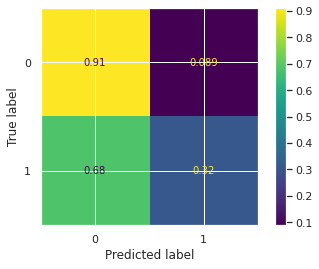

In [396]:
plot_confusion_matrix(logmodel_under, X_test, y_test,normalize='true')

#### Standard confusion matrix

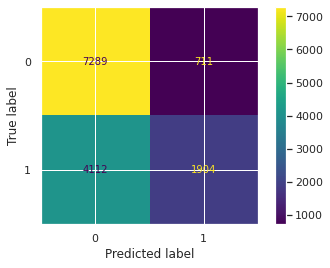

In [397]:
plot_confusion_matrix(logmodel_under, X_test, y_test)

## SVM

-df_alpha_B trained with oversampled data gave the best performing SVM performance (7.2.2.11)

* The model uses variables: 'age', 'prod_B', 'turnover_A', 'turnover_B' to make predictions.

### Predictions SVM_over

In [398]:
test_predictions_svm_over = SVM_over.predict(X_test)

In [399]:
print('1. The F-1 score of the model {}\n'.format(f1_score(y_test, test_predictions_svm_over, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(y_test, test_predictions_svm_over, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(y_test, test_predictions_svm_over)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(y_test, test_predictions_svm_over)))

1. The F-1 score of the model 0.6197144038243759

2. The recall score of the model 0.6498204787234042

3. Classification report 
               precision    recall  f1-score   support

           0       0.79      0.46      0.58      8000
           1       0.54      0.84      0.66      6016

    accuracy                           0.62     14016
   macro avg       0.67      0.65      0.62     14016
weighted avg       0.68      0.62      0.61     14016
 

4. Confusion matrix 
 [[3695 4305]
 [ 976 5040]] 



#### Normalized confusion matrix

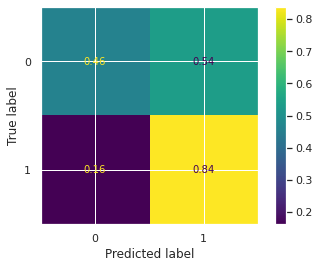

In [400]:
plot_confusion_matrix(SVM_over, X_test, y_test,normalize='true')

#### Standard confusion matrix

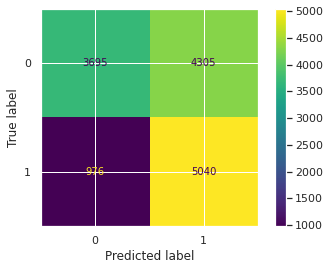

In [401]:
plot_confusion_matrix(SVM_over, X_test, y_test)

### Predictions SVM_over

In [402]:
test_predictions_svm_under = SVM_under.predict(X_test)

In [403]:
print('1. The F-1 score of the model {}\n'.format(f1_score(y_test, test_predictions_svm_under, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(y_test, test_predictions_svm_under, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(y_test, test_predictions_svm_under)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(y_test, test_predictions_svm_under)))

1. The F-1 score of the model 0.3021368748734004

2. The recall score of the model 0.5008125

3. Classification report 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      8000
           1       0.43      1.00      0.60      6016

    accuracy                           0.43     14016
   macro avg       0.71      0.50      0.30     14016
weighted avg       0.76      0.43      0.26     14016
 

4. Confusion matrix 
 [[  13 7987]
 [   0 6016]] 



#### Normalized confusion matrix

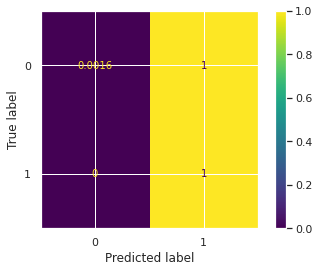

In [404]:
plot_confusion_matrix(SVM_under, X_test, y_test,normalize='true')

#### Standard confusion matrix

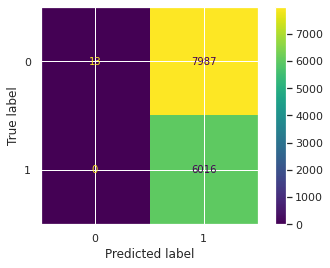

In [405]:
plot_confusion_matrix(SVM_under, X_test, y_test)

## Random forest 

-df_alpha_A trained with oversampled data gave the best performing random forest (7.3.1.4)

* The model uses variables: 'age', 'prod_B', 'turnover_A', 'turnover_B' to make predictions.

### Predictions RFC over

In [406]:
test_predictions_RFC_over = RFC_over.predict(X_test)

In [407]:
print('1. The F-1 score of the model {}\n'.format(f1_score(y_test, test_predictions_RFC_over, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(y_test, test_predictions_RFC_over, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(y_test, test_predictions_RFC_over)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(y_test, test_predictions_RFC_over)))

1. The F-1 score of the model 0.45325164591203343

2. The recall score of the model 0.5403563829787233

3. Classification report 
               precision    recall  f1-score   support

           0       0.59      0.99      0.74      8000
           1       0.86      0.09      0.17      6016

    accuracy                           0.60     14016
   macro avg       0.73      0.54      0.45     14016
weighted avg       0.71      0.60      0.49     14016
 

4. Confusion matrix 
 [[7909   91]
 [5462  554]] 



#### Normalized confusion matrix

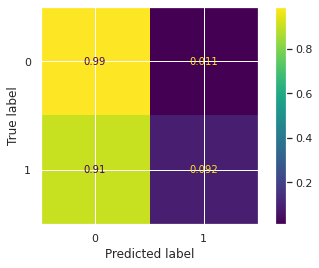

In [408]:
plot_confusion_matrix(RFC_over, X_test, y_test,normalize='true')

#### Standard confusion matrix

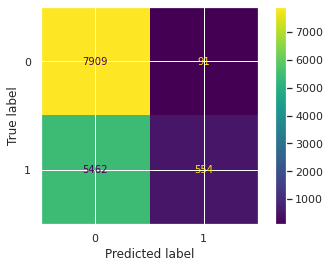

In [409]:
plot_confusion_matrix(RFC_over, X_test, y_test)

### Predictions RFC under

In [410]:
test_predictions_RFC_under = RFC_under.predict(X_test)

In [411]:
print('1. The F-1 score of the model {}\n'.format(f1_score(y_test, test_predictions_RFC_under, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(y_test, test_predictions_RFC_under, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(y_test, test_predictions_RFC_under)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(y_test, test_predictions_RFC_under)))

1. The F-1 score of the model 0.4116695438729969

2. The recall score of the model 0.5423164893617022

3. Classification report 
               precision    recall  f1-score   support

           0       0.82      0.12      0.21      8000
           1       0.45      0.97      0.62      6016

    accuracy                           0.48     14016
   macro avg       0.64      0.54      0.41     14016
weighted avg       0.66      0.48      0.38     14016
 

4. Confusion matrix 
 [[ 951 7049]
 [ 206 5810]] 



#### Normalized confusion matrix

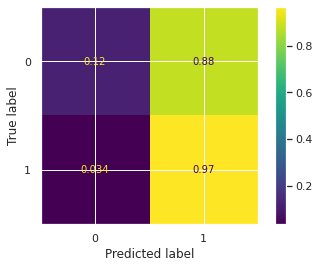

In [412]:
plot_confusion_matrix(RFC_under, X_test, y_test,normalize='true')

#### Standard confusion matrix

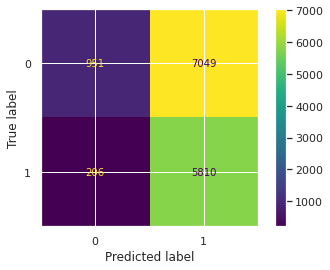

In [413]:
plot_confusion_matrix(RFC_under, X_test, y_test)